In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from adjustText import adjust_text
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D

## references
https://infograficos.oglobo.globo.com/cultura/a-quantidade-de-filmes-nacionais-lancados-no-cinema-ano-a-ano.html

https://oca.ancine.gov.br

In [2]:
#Sraper
df_feabr = pd.read_csv('5403Films.csv')
df_feakr = pd.read_csv('FeatureFilms-KR.csv')
df_feafr = pd.read_csv('FeatureFilms-FR.csv')

In [3]:
df_brnov = pd.read_csv('MoviesFinais-1011.csv')
df_brnov = df_brnov[df_brnov.startYear<=2019]
df_brnov['year'] = df_brnov.startYear

In [4]:
#dados abertos
df_feawr = pd.read_csv('300kFilms.csv')
df_feawr.rename(columns={'primaryTitle':'title', 'startYear':'year'}, inplace=True)

In [5]:
df_feawr.head()

,Unnamed: 0,tconst,titleType,title,originalTitle,isAdult,year,endYear,runtimeMinutes,genres,...,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,\N,nan
0,3817,tt0003854,movie,Dodge City Trail,Dodge City Trail,0,1936,\N,56,"Adventure,Music,Western",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,15494,tt0015724,movie,Dama de noche,Dama de noche,0,1993,\N,102,"Drama,Mystery,Romance",...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15796,tt0016029,movie,The Little Colonel,The Little Colonel,0,1935,\N,81,"Comedy,Family,Musical",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17712,tt0017961,movie,Happiness,Schaste,0,1935,\N,95,"Comedy,Drama",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18603,tt0018867,movie,Escape from Hong Kong,Escape from Hong Kong,0,1942,\N,60,"Adventure,War",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [6]:
faltafinal = pd.read_excel('Falta1111-1300.xls')
faltafinal.shape

(500, 16)

In [7]:
#Apenas Ancine
ancine_only = faltafinal[faltafinal.IMDb=='None']
ancine_only.shape

(172, 16)

In [11]:
#Ancine e IMDb
ancine_imdb = faltafinal[faltafinal.IMDb!='None']
add_imdb = ancine_imdb[~ancine_imdb.IMDb.isin(df_brnov.tconst)][['IMDb','Título', 'Ano de Lançamento']]
add_imdb.columns = ['tconst', 'originalTitle', 'startYear']
print(add_imdb.shape)

(104, 3)


In [10]:
#Já estavam no df_brnov
already_imdb = ancine_imdb[ancine_imdb.IMDb.isin(df_brnov.tconst)]
already_imdb.shape

(224, 16)

In [12]:
#Final DataFrame
df_brnovfinal = pd.concat([df_brnov, add_imdb], axis=0, sort=False).fillna(0)
df_brnovfinal.shape

(5366, 42)

In [ ]:
indepe = inde_ratings[inde_ratings.ratings.fillna(0)!=0]
indepe_films = indepe.groupby('startYear').size().values
indepe_years = indepe.groupby('startYear').size().index
ancine = pd.read_excel('2102.xlsx', header=2)

In [38]:
#DADOS ABERTOS ANCINE
ancine.head()

,Ano de Lançamento,Certificado de Produto Brasileiro (CPB),Título,Direção,Gênero,Empresa Produtora Brasileira Majoritária,UF,Empresa Produtora Minoritária Brasileira,UF.1,Distribuidora,Máximo de Salas,Renda (R$),Público
0,2018,B1800380700000,10 Segundos Para Vencer,José Alvarenga Jr.,Ficção,Tambellini Filmes,RJ,Globo Filmes/Canal Brasil/Xanadu,RJ,Imagem,301,801026,49147
1,2018,B1800469700000,A Cabeça De Gumercindo Saraiva,Tabajara Ruas,Ficção,Walper Ruas Produções,RS,-,-,Elo Company,27,53687,4959
2,2018,B1600756100000,A Cidade Do Futuro,Cláudio Marques/Marilia Hughes Guerreiro,Ficção,Coisa de Cinema,BA,-,-,Vitrine Filmes/Espaço Filmes,22,153437,11786
3,2018,B1600680500000,A Destruição De Bernardet,Claudia Priscilla/Pedro Marques,Documentário,Paleo TV,SP,Válvula Produções/Canal Brasil,SP/RJ,Paleotv,12,10352,1355
4,2018,B1800033200000,A Imagem Da Tolerância,Paula Trabulsi/Joana Mariani,Documentário,Maya Filmes/Planetário Filmes,SP/RJ,Globo Filmes,RJ,Espaço Filmes,8,10006,671


In [ ]:
df_linha = pd.concat([df_brnovfinal[df_brnovfinal.startYear<1995], \
           ancine[~ancine['Certificado de Produto Brasileiro (CPB)'].isin(ancine_only['Certificado de Produto Brasileiro (CPB)'].values)][['Título', 'Ano de Lançamento']].rename(columns={'Título':'originalTitle', 'Ano de Lançamento':'year'}), \
          ancine_only[['Título', 'Ano de Lançamento']].rename(columns={'Título':'originalTitle', 'Ano de Lançamento':'year'}), \
          indepe], axis=0, sort=False).fillna(0)






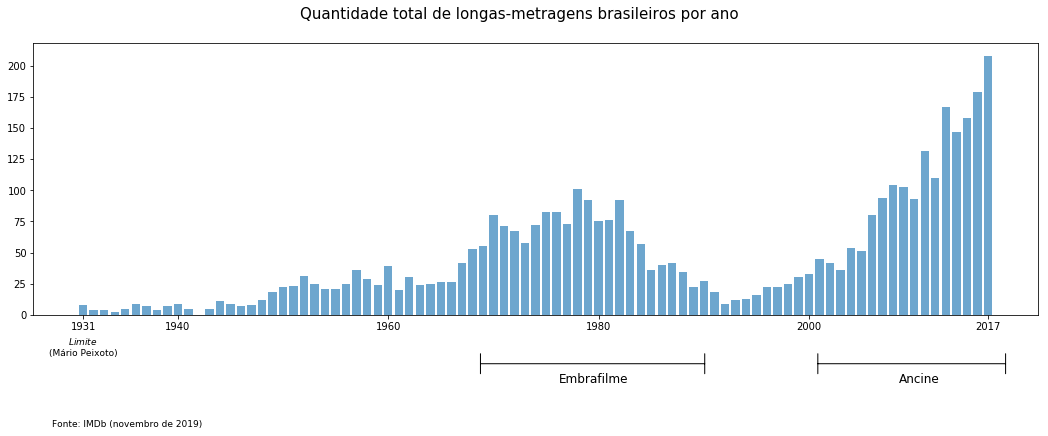

In [28]:
plot_serie2([df_linha[(df_linha.year<=2017)]], ['Brasil'], False, 'LinhaDoTempo', Brasil=True, invisible_x=False)

In [55]:
df_brnovfinal.columns

Index(['Unnamed: 0', 'tconst', 'titleType', 'primaryTitle', 'originalTitle',
       'isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres', 'year',
       'genre', 'Adventure', 'Music', 'Western', 'Drama', 'Mystery', 'Romance',
       'Comedy', 'Family', 'Musical', 'War', '\N', 'Crime', 'Action',
       'History', 'Thriller', 'Animation', 'Documentary', 'Fantasy',
       'Biography', 'Horror', 'Sport', 'Film-Noir', 'Sci-Fi', 'News',
       'Talk-Show', 'Adult', 'Reality-TV', 'Short', 'Game-Show', 'total'],
      dtype='object')

In [35]:
def plot_serie2(dfs, labels, savefig,title, Brasil, invisible_x):
    feature = []
    years = np.arange(1931, 2018)
    for df in dfs:
        feature_films = []
        for year in years:
            try:
                feature_films.append(df.groupby('year').get_group(year).shape[0])
            except:
                feature_films.append(0)
        feature.append(feature_films)
        
    f, ax = plt.subplots(figsize=(18,5))
    
    color = pd.DataFrame(data={'country':['Mundo', 'Brasil', 'França', 'Coréia do Sul'], 'color':['tab:green', 'tab:blue', \
             
                                                                                     'tab:red', 'tab:orange']})
    
    for i in range(len(dfs)):
        ax.bar(years, feature[i], alpha=0.65, label=labels[i], color = color[color.country==labels[i]].color.values[0])
    
    if (invisible_x):
        ax.set_xticklabels([])
    else:
        xticks = np.arange(1940,2019, 20)
        xticks = np.insert(xticks, 0, 1931)
        xticks = np.insert(xticks, len(xticks), 2017)
        plt.xticks(xticks)
        
    if (Brasil):
        plt.text(x=1931, y=-33, s='$\mathit{Limite}$\n(Mário Peixoto)', fontsize=9, ha="center")
        #plt.text(x=2019, y=-36, s='Bacurau', fontsize=10, ha="center")
        plt.text(x=1969+(1990-1969)/2, y=-55, s='\nEmbrafilme', fontsize=12, ha="center")
        plt.annotate('', xy=((1970-1931)/(2019-1931), -.18), xycoords='axes fraction', xytext=((1990-1931)/(2019-1931), -0.18), 
            arrowprops=dict(arrowstyle="|-|", color='black'))
    
        plt.text(x=2002.5+(2017-2001)/2, y=-55, s='\nAncine', fontsize=12, ha="center")
        plt.annotate('', xy=((1998-1931)/(2017-1931), -0.18), xycoords='axes fraction', xytext=(.97, -0.18), \
            arrowprops=dict(arrowstyle="|-|", color='black'))
        plt.suptitle('Quantidade total de longas-metragens brasileiros por ano\n\n', fontsize=15)
        #plt.bar(fsa_years, fsa_films,  label='Filmes com valores captados\natravés de mecanismos de incentivo e FSA', color='green')
        plt.text(x=1928, y=-90, s='Fonte: IMDb (novembro de 2019)', fontsize=9, ha="left")
    
    #plt.legend()
    if (savefig==True):
        plt.savefig(title+'.png', dpi=300,bbox_inches='tight')


In [30]:
def plot_serie3(dfs, labels, savefig,title, Brasil, invisible_x):
    feature = []
    years = np.arange(1995, 2018)
    for df in dfs:
        feature_films = []
        for year in years:
            try:
                feature_films.append(df.groupby('year').get_group(year).shape[0])
            except:
                feature_films.append(0)
        feature.append(feature_films)

        
    f, ax = plt.subplots(figsize=(6,5))
    
    color = pd.DataFrame(data={'country':['Mundo', 'Brasil', 'França', 'Coréia do Sul'], 'color':['tab:green', 'tab:blue', \
             
                                                                                          'tab:red', 'tab:orange']})
    for i in range(len(dfs)):
        ax.bar(years, feature[i], alpha=0.65, label = 'fonte: IMDb', color = color[color.country==labels[i]].color.values[0])
    
    if (invisible_x):
        ax.set_xticklabels([])
    else:
        xticks = np.arange(1995,2019, 4)
        plt.xticks(xticks)
        
    if (Brasil):
        #plt.bar(cinema_years, cinema_films,  label='Filmes lançados no cinema sem incentivo', color='red')
        plt.bar(fsa_years, fsa_films,  label='fonte: Ancine', color='green')
        plt.xlabel('Ano')
        plt.ylabel('Quantidade de filmes')
    plt.legend()
    if (savefig==True):
        plt.savefig(title+'.png', dpi=300,bbox_inches='tight')


In [31]:
def annotation_line( ax, xmin, xmax, y, text, ytext=0, linecolor='black', linewidth=1, fontsize=12 ):

    ax.annotate('', xy=(xmin, y), xytext=(xmax, y), xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|', 'color':linecolor, 'linewidth':linewidth})
    ax.annotate('', xy=(xmin, y), xytext=(xmax, y), xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|', 'color':linecolor, 'linewidth':linewidth})

    xcenter = xmin + (xmax-xmin)/2
    if ytext==0:
        ytext = y + ( ax.get_ylim()[1] - ax.get_ylim()[0] ) / 20

    ax.annotate( text, xy=(xcenter,ytext), ha='center', va='center', fontsize=fontsize)

In [32]:
color = pd.DataFrame(data={'country':['Mundo', 'Brasil', 'França', 'Korea'], 'color':['tab:green', 'tab:blue', \
                                                                                         'tab:red', 'tab:orange']})

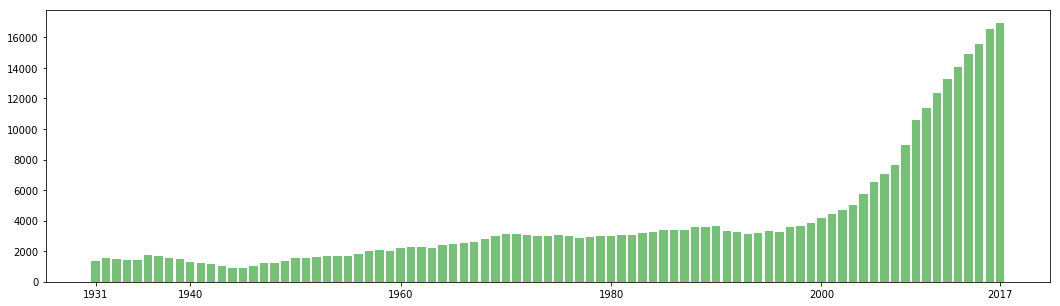

In [36]:
#TODOS OS FILMES DO MUNDO
plot_serie2([df_feawr], ['Mundo'], False, 'Mundo', Brasil=False, invisible_x=False)

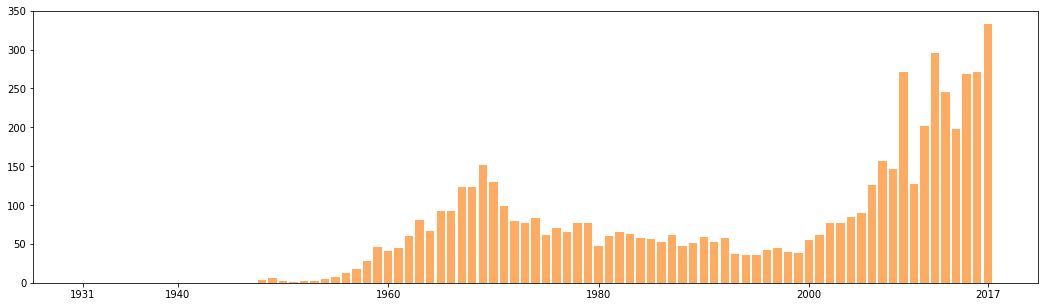

In [39]:
plot_serie2([df_feakr[df_feakr.imdb_rating!=0]], ['Coréia do Sul'], False, 'Coreia1811', Brasil=False, invisible_x=False)

In [40]:
ancine_only = pd.read_csv('Ancine_only.csv')
independentes = pd.read_csv('Independentes.csv')
ancine = pd.read_excel('2102.xlsx', header=2)

In [5]:
#Filmes com registro apenas na Ancine e não no IMDbt: com fomento, sem público
ancine_only.iloc[30:, :]

,Unnamed: 0,Unnamed: 0.1,Ano de Lançamento,Certificado de Produto Brasileiro (CPB),Título,Direção,IMDb,Gênero,Empresa Produtora Brasileira Majoritária,UF,Empresa Produtora Minoritária Brasileira,UF.1,Distribuidora,Máximo de Salas,Renda (R$),Público,new_title
30,38,88,2018,B1800177600000,Memória Italiana - Histórias Em Família,Adriana Da Silva,None,Documentário,Filmland Internacional,SP,-,-,Latinamerica Entretenimento Internacional,1,854,77,memoria italiana historias em familia
31,40,1067,2010,B0901099400000,"Depois de Ontem, Antes de Amanhã",Christine Liu,None,Documentário,Vega Filmes,SP,-,-,Vega Filmes,1,908,85,depois de ontem antes de amanha
32,42,1136,2009,B1001132300000,BR3 - A Peça,Evaldo Mocarzel,None,Documentário,Casa Azul Produções,SP,-,-,Casa Azul,1,468,89,br3 a peca
33,43,358,2016,B1500711700000,Arminda Lopes — A Estética Além da Dor,Luzimar Batista Stricher,None,Documentário,Stricher Comunicações,RS,-,-,Lança Filmes,1,723,91,arminda lopes — a estetica alem da dor
34,45,333,2017,B1700498000000,Todos,Luiz Alberto Cassol/Marilaine Castro da Costa,None,Documentário,Accorde Filmes,RS,-,-,Accorde Audiovisuais,1,665,93,todos
35,46,36,2018,B1800218400000,Bravas Donnas ? Memória Italiana,Adriana Da Silva,None,Documentário,Filmland Internacional,SP,-,-,Latinamerica Entretenimento Internacional,1,2680,103,bravas donnas ? memoria italiana
36,47,210,2017,B1402701900000,Café – Um Dedo de Prosa,Maurício Squarisi,None,Animação,Tupi Desenhos Animados,SP,-,-,Polifilmes/Spcine,1,1530.08,104,cafe – um dedo de prosa
37,48,896,2012,B1201564700000,Expedicionários,Otavio Cury,None,Documentário,In Brasil Cultural/Outros Filmes,SP,-,-,Outros Filmes Produções,2,546.5,104,expedicionarios
38,49,1165,2009,B0901082400000,Mesa de Bar Onde Tudo Acontece,Kleber Paredes/Marcelo Campos de Almeida/Ron K...,None,Ficção,Bossal Filmes,RJ,-,-,Mirasul,3,1061,104,mesa de bar onde tudo acontece
39,50,10,2018,B1800131200000,A Tropa De Trapo - Na Selva Do Arco-Íris,Alex Colls,None,Animação,Raiz Produções,SP,Mono Estúdio de Animação,SP,Raiz Filmes,1,520,108,a tropa de trapo na selva do arcoiris


In [44]:
ancine_only_films = np.array(pd.DataFrame(ancine_only.groupby('Ano de Lançamento').size(), index = np.arange(1995, 2019)).fillna(0).values).flatten()

In [46]:
ancine_imdb_films = (pd.DataFrame(ancine.groupby('Ano de Lançamento').size(), index = np.arange(1995, 2019)).fillna(0).values - \
pd.DataFrame(ancine_only.groupby('Ano de Lançamento').size(), index = np.arange(1995, 2019)).fillna(0).values).flatten()

In [47]:
ancine_imdb_years = np.arange(1995, 2019)

In [48]:
independentes_films = independentes[independentes['runtimeMinutes'].replace(['\\N'], '0').astype(int)!=0].groupby('startYear').size().values
independentes_years = independentes[independentes['runtimeMinutes'].replace(['\\N'], '0').astype(int)!=0].groupby('startYear').size().index

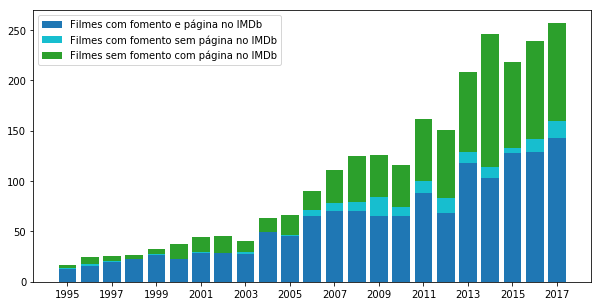

In [49]:
f, ax = plt.subplots(figsize=(10,5))
ax.bar(ancine_imdb_years[:-1], ancine_imdb_films[:-1], label='Filmes com fomento e página no IMDb', color='tab:blue')
ax.bar(ancine_imdb_years[:-1], ancine_only_films[:-1], bottom=ancine_imdb_films[:-1], label='Filmes com fomento sem página no IMDb', color='tab:cyan')
ax.bar(ancine_imdb_years[:-1], independentes_films[:-1], bottom=ancine_imdb_films[:-1]+ancine_only_films[:-1], label='Filmes sem fomento com página no IMDb', color='tab:green')
plt.xticks(np.arange(1995,2018, 2))
plt.legend()
#plt.savefig('Indepentendes2.png', dpi=200)

In [50]:
ancine_imdb.head()

,Unnamed: 0,Ano de Lançamento,Certificado de Produto Brasileiro (CPB),Título,Direção,IMDb,Gênero,Empresa Produtora Brasileira Majoritária,UF,Empresa Produtora Minoritária Brasileira,UF.1,Distribuidora,Máximo de Salas,Renda (R$),Público,new_title
2,1316,2007,B0600555700000,Inacreditável - a Batalha dos Aflitos,Beto Souza,tt5274254,Documentário,G7 Cinema/TGD Filmes,SP/RS,-,-,G7 Cinema,ND,ND,0,inacreditavel a batalha dos aflitos
7,1464,2005,B0500279400000,Preto e Branco,Carlos Nader,tt1711494,Documentário,Iucatan Produções/Já Filmes,SP/SP,-,-,Polifilmes,ND,ND,0,preto e branco
8,1504,2004,B0500408600000,Motoboys - Vida Loca,Caito Ortiz,tt0824692,Ficção,Prodigo Films,SP,-,-,Mais Filmes,ND,ND,0,motoboys vida loca
12,110,2018,B1800055100000,O Cravo E A Rosa - O Documentário,Jorge Elias Primo Neto,tt10984750,Documentário,Kellys Kelfis,RJ,-,-,Nozes Produções,1,70,6,o cravo e a rosa o documentario
20,1404,2006,B0600504400000,Nzinga,Octávio Bezerra,tt0926215,Documentário,Olhar Feminino Produções,RJ,-,-,Olhar Feminino,1,212,21,nzinga


In [51]:
inde_ratings = pd.read_csv('Independentes_Ratings1111.csv').iloc[:, 3:]
inde_ratings.head()

,Unnamed: 0.1.1.1,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,...,Sci-Fi,News,Talk-Show,Adult,Reality-TV,Short,Game-Show,total,new_title,ratings
0,60094,tt0115435,movie,16060,16060,0,1995,\N,86,"Comedy,Drama",...,0,0,0,0,0,0,0,2,16060,7.0
1,68535,tt0137472,movie,Drama Urbano,Drama Urbano,0,1998,\N,\N,Crime,...,0,0,0,0,0,0,0,1,drama urbano,NaN
2,71832,tt0150796,movie,Guerra e Liberdade - Castro Alves em São Paulo,Guerra e Liberdade - Castro Alves em São Paulo,0,1998,\N,\N,"Drama,Romance",...,0,0,0,0,0,0,0,2,guerra e liberdade castro alves em sao paulo,NaN
3,83462,tt0189441,movie,Contos de Lygia,Contos de Lygia,0,1998,\N,125,Drama,...,0,0,0,0,0,0,0,1,contos de lygia,5.0
4,83583,tt0189856,movie,Olé: Um Movie Cabra da Peste,Olé: Um Movie Cabra da Peste,0,2000,\N,94,Comedy,...,0,0,0,0,0,0,0,1,ole um movie cabra da peste,5.5


In [52]:
indepe = inde_ratings[inde_ratings.ratings.fillna(0)!=0]
indepe_films = indepe.groupby('startYear').size().values
indepe_years = indepe.groupby('startYear').size().index
indepe.shape

(464, 44)

In [53]:
indepe.groupby('startYear').size().index

Int64Index([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
            2017, 2018],
           dtype='int64', name='startYear')

In [54]:
amadores = inde_ratings[inde_ratings.ratings.fillna(0)==0]
amadores_films = amadores.groupby('startYear').size().values
amadores_years = amadores.groupby('startYear').size().index
amadores.shape

(1010, 44)

In [55]:
ancine_imdb.head()

,Unnamed: 0,Ano de Lançamento,Certificado de Produto Brasileiro (CPB),Título,Direção,IMDb,Gênero,Empresa Produtora Brasileira Majoritária,UF,Empresa Produtora Minoritária Brasileira,UF.1,Distribuidora,Máximo de Salas,Renda (R$),Público,new_title
2,1316,2007,B0600555700000,Inacreditável - a Batalha dos Aflitos,Beto Souza,tt5274254,Documentário,G7 Cinema/TGD Filmes,SP/RS,-,-,G7 Cinema,ND,ND,0,inacreditavel a batalha dos aflitos
7,1464,2005,B0500279400000,Preto e Branco,Carlos Nader,tt1711494,Documentário,Iucatan Produções/Já Filmes,SP/SP,-,-,Polifilmes,ND,ND,0,preto e branco
8,1504,2004,B0500408600000,Motoboys - Vida Loca,Caito Ortiz,tt0824692,Ficção,Prodigo Films,SP,-,-,Mais Filmes,ND,ND,0,motoboys vida loca
12,110,2018,B1800055100000,O Cravo E A Rosa - O Documentário,Jorge Elias Primo Neto,tt10984750,Documentário,Kellys Kelfis,RJ,-,-,Nozes Produções,1,70,6,o cravo e a rosa o documentario
20,1404,2006,B0600504400000,Nzinga,Octávio Bezerra,tt0926215,Documentário,Olhar Feminino Produções,RJ,-,-,Olhar Feminino,1,212,21,nzinga


In [56]:
ancine_imdb_films.sum()

1570.0

In [ ]:
independentes = df_brnov[(~df_brnov.tconst.isin(faltafinal.IMDb)) & (df_brnov.startYear>=1995) & (df_brnov.startYear<=2018) & \
         (~df_brnov.new_title.isin(ancine.new_title))]

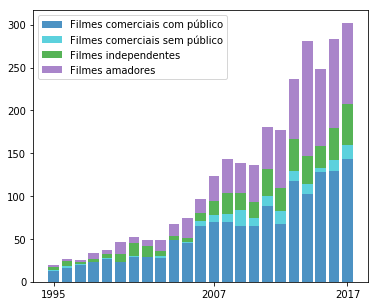

In [57]:
f, ax = plt.subplots(figsize=(6,5))
ax.bar(ancine_imdb_years[:-1], ancine_imdb_films[:-1], label='Filmes comerciais com público', color="tab:blue", alpha=.8)
ax.bar(ancine_imdb_years[:-1], ancine_only_films[:-1], bottom=ancine_imdb_films[:-1], label='Filmes comerciais sem público', color='tab:cyan', alpha=.7)
ax.bar(indepe_years[:-1], indepe_films[:-1], bottom=ancine_imdb_films[:-1]+ancine_only_films[:-1], label='Filmes independentes', color='tab:green', alpha=.8)
ax.bar(amadores_years[:-1], amadores_films[:-1], bottom=ancine_imdb_films[:-1]+ancine_only_films[:-1]+indepe_films[:-1], label='Filmes amadores', color='tab:purple', alpha=.8)
plt.xticks([1995, 2007, 2017])
plt.legend()
#plt.savefig('Natureza-Final.png', dpi=200)

In [166]:
indepe[(indepe.startYear>2001) & (indepe.startYear<2015)]

,Unnamed: 0.1.1.1,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,...,Sci-Fi,News,Talk-Show,Adult,Reality-TV,Short,Game-Show,total,new_title,ratings
35,114672,tt0305170,movie,In Cane for Life,A Vida em Cana,0,2002,\N,68,Documentary,...,0,0,0,0,0,0,0,1,a vida em cana,7.3
37,115750,tt0309557,movie,Eldorado - Lituanos no Brasil,Eldorado - Lituanos no Brasil,0,2002,\N,68,Documentary,...,0,0,0,0,0,0,0,1,eldorado lituanos no brasil,7.2
43,117117,tt0314444,movie,Noites do Norte Ao Vivo,Noites do Norte Ao Vivo,0,2002,\N,120,Documentary,...,0,0,0,0,0,0,0,1,noites do norte ao vivo,8.8
44,117362,tt0315376,movie,The Champagne Club,The Champagne Club,0,2002,\N,87,Horror,...,0,0,0,0,0,0,0,1,the champagne club,5.0
46,118615,tt0320415,movie,O Santo Mágico,O Santo Mágico,0,2002,\N,\N,Drama,...,0,0,0,0,0,0,0,1,o santo magico,5.9
49,119375,tt0325190,movie,The Old Soldier's Ballad,A Cobra Fumou,0,2002,\N,94,Documentary,...,0,0,0,0,0,0,0,1,a cobra fumou,6.7
50,119771,tt0327991,movie,"Joana e Marcelo, Amor (Quase) Perfeito","Joana e Marcelo, Amor (Quase) Perfeito",0,2002,\N,103,"Comedy,Romance",...,0,0,0,0,0,0,0,2,joana e marcelo amor (quase) perfeito,6.9
52,121192,tt0335054,movie,Two Lost in a Dirty Night,2 Perdidos numa Noite Suja,0,2002,\N,100,Drama,...,0,0,0,0,0,0,0,1,2 perdidos numa noite suja,6.7
53,121610,tt0337513,movie,Zico,Zico,0,2002,\N,84,Documentary,...,0,0,0,0,0,0,0,1,zico,6.9
56,124254,tt0349054,movie,35: O Assalto ao Poder,35: O Assalto ao Poder,0,2002,\N,98,Documentary,...,0,0,0,0,0,0,0,1,35 o assalto ao poder,7.1


In [67]:
ancine_imdb_films = [i.get_height() for i in rects1]
ancine_only_films = [i.get_height() for i in rects2]
independentes_films = [i.get_height() for i in rects3]
amadores_films = [i.get_height() for i in rects4]

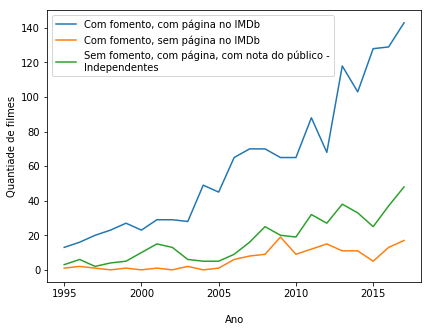

In [92]:
f, ax = plt.subplots(figsize=(6.7,5))
plt.plot(np.arange(1995, 2018), ancine_imdb_films, label='Com fomento, com página no IMDb')
plt.plot(np.arange(1995, 2018), ancine_only_films, label='Com fomento, sem página no IMDb')
plt.plot(np.arange(1995, 2018), independentes_films, label='Sem fomento, com página, com nota do público -\nIndependentes')
plt.ylabel('Quantiade de filmes')
plt.xlabel('\nAno')
plt.legend()

Text(0.5, 1.0, 'Razão entre filmes independentes e filmes com fomento\n')

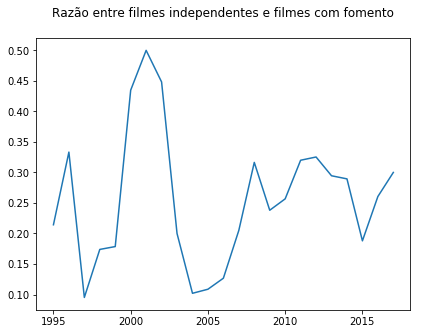

In [91]:
f, ax = plt.subplots(figsize=(6.7,5))
plt.plot(np.arange(1995, 2018), np.array(independentes_films)/(np.array(ancine_imdb_films)+np.array(ancine_only_films)))
plt.title('Razão entre filmes independentes e filmes com fomento\n')

In [90]:
import string
import unicodedata

def strip_accents(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
                  if unicodedata.category(c) != 'Mn')

In [91]:
def clean_name(name):
    return strip_accents(name.rstrip(string.punctuation).replace(',', '').replace('-', '').replace(':', '').lower())

In [92]:
df_brnov['new_title'] = df_brnov.originalTitle.apply(clean_name)
ancine['new_title'] = ancine.Título.apply(clean_name)
df_sup = df_brnov[(df_brnov.year>=1995) & (df_brnov.year>=2018)]

#### Dataframes independentes e ancine_only

In [97]:
#Está na Ancine e no IMDb
ancine[ancine.new_title.isin(df_brnov.new_title)].groupby('Ano de Lançamento').size().values

array([ 10,  14,  18,  17,  25,  21,  25,  25,  23,  42,  36,  54,  54,
        59,  53,  49,  65,  48,  87,  90, 103, 100, 103, 121])

In [99]:
#Está na Ancine mas NÃO no IMDb
ancine[~ancine.new_title.isin(df_brnov.new_title)].groupby('Ano de Lançamento').size().values

array([ 4,  4,  3,  6,  3,  2,  5,  4,  7,  7, 10, 17, 24, 20, 31, 25, 35,
       35, 42, 24, 30, 42, 57, 63])

In [100]:
def publico(pub):
    try:
        return int(pub)
    except:
        print(pub)

In [101]:
ancine['Público '] = ancine['Público '].replace(['ND'], [0])

In [102]:
ancine[~ancine.new_title.isin(df_brnov.new_title)].head()

,Ano de Lançamento,Certificado de Produto Brasileiro (CPB),Título,Direção,Gênero,Empresa Produtora Brasileira Majoritária,UF,Empresa Produtora Minoritária Brasileira,UF.1,Distribuidora,Máximo de Salas,Renda (R$),Público,new_title
3,2018,B1600680500000,A Destruição De Bernardet,Claudia Priscilla/Pedro Marques,Documentário,Paleo TV,SP,Válvula Produções/Canal Brasil,SP/RJ,Paleotv,12,10352,1355,a destruicao de bernardet
10,2018,B1800131200000,A Tropa De Trapo - Na Selva Do Arco-Íris,Alex Colls,Animação,Raiz Produções,SP,Mono Estúdio de Animação,SP,Raiz Filmes,1,520,108,a tropa de trapo na selva do arcoiris
12,2018,B1700329300000,A Última Chance,Paulo Thiago,Ficção,Melodrama Produções,RJ,Canal Brasil,RJ,Europa,2,582,51,a ultima chance
17,2018,B1800130000000,Alguém Como Eu,Leonel Vieira,Ficção,Gullane,SP,Paris Entretenimento/Stopline Films Brasil/Tel...,SP/SP/RJ,Downtown/Paris,134,402739,28530,alguem como eu
19,2018,B1800470600000,Amanhã Chegou,Renata Caldas Simões,Documentário,Atômica,SP,Canal Azul/Tocha Produções,SP,Elo Company,21,6033,686,amanha chegou


In [103]:
ancine[~ancine.new_title.isin(df_brnov.new_title)].sort_values(by='Público ').to_excel('Falta1111.xlsx')
ancine[~ancine.new_title.isin(df_brnov.new_title)].shape

(500, 14)

In [40]:
faltafinal = pd.read_excel('Falta1111-1300.xls')
faltafinal.shape

(500, 16)

In [41]:
#Apenas Ancine
ancine_only = faltafinal[faltafinal.IMDb=='None']
ancine_only.shape

(172, 16)

In [44]:
#Já estavam no df_brnov
already_imdb = ancine_imdb[ancine_imdb.IMDb.isin(df_brnov.tconst)]
already_imdb.shape

(224, 16)

In [43]:
#Ancine e IMDb
ancine_imdb = faltafinal[faltafinal.IMDb!='None']
add_imdb = ancine_imdb[~ancine_imdb.IMDb.isin(df_brnov.tconst)][['IMDb','Título', 'Ano de Lançamento']]
add_imdb.columns = ['tconst', 'originalTitle', 'startYear']
print(add_imdb.shape)
add_imdb.head()

(104, 3)


,tconst,originalTitle,startYear
20,tt0926215,Nzinga,2006
23,tt10063068,Santo Amaro era skatista,2017
25,tt1914331,Reus,2013
34,tt5574390,Estamos vivos,2017
57,tt2166420,O Manuscrito Perdido,2012


In [228]:
df_brnov[(~df_brnov.tconst.isin(faltafinal.IMDb)) & (df_brnov.startYear>=1995) & (df_brnov.startYear<=2018) & \
         (~df_brnov.new_title.isin(ancine.new_title))].to_csv('Independentes.csv')

In [251]:
print(ancine_only.shape)
ancine_only.head()

(172, 16)


,Unnamed: 0,Ano de Lançamento,Certificado de Produto Brasileiro (CPB),Título,Direção,IMDb,Gênero,Empresa Produtora Brasileira Majoritária,UF,Empresa Produtora Minoritária Brasileira,UF.1,Distribuidora,Máximo de Salas,Renda (R$),Público,new_title
0,925,2012,B1201566400000,Ponto Org,Patrícia Moran,None,Ficção,Anderson Faria Produções Cinematográficas,MG,Dezenove Som e Imagens/Patrícia Moran,SP/MG,Usina Digital,ND,ND,0,ponto org
1,1169,2009,B1101495000000,Naufrágio - Mistério e Morte na Catástrofe do ...,Edu Sallouti,None,Documentário,Mastershot Produções,SP,-,-,Master Shot Produções,ND,ND,0,naufragio misterio e morte na catastrofe do p...
3,878,2012,B1201641300000,Clementina de Jesus - Rainha Quelé,Werinton Kermes,None,Documentário,Werinton Kermes,SP,-,-,Werinton Kermes Telles Marsal,ND,ND,0,clementina de jesus rainha quele
4,1397,2006,B0600539200000,Intervalo Clandestino,Eryk Rocha,None,Documentário,Grupo Novo de Cinema e TV,RJ,-,-,GNCTV,ND,419,0,intervalo clandestino
5,698,2014,B1302025400000,O Último Lance de um Leilão,Fabricio Cavalcanti/Orides Vicente,None,Ficção,Platéia Filmes/Voltado para o Trono,SP,Platéia Filmes,SP,Sam Rádio Pictures,ND,ND,0,o ultimo lance de um leilao


In [255]:
ancine.shape[0]-ancine_only.shape[0]

1570

In [260]:
ancine_only.to_csv('Ancine_only.csv')

In [258]:
imdb_and_ancine = df_brnovfinal[(df_brnovfinal.new_title.isin(ancine.new_title)) | (df_brnovfinal.tconst.isin(faltafinal.IMDb))]
imdb_and_ancine.to_csv('IMDB_and_Ancine.csv')

In [262]:
imdb_and_ancine.shape[0]+independentes.shape[0]

3062

In [265]:
df_brnovfinal[(df_brnovfinal.startYear>=1995) & (df_brnovfinal.startYear<=2018)].shape[0]

3035

In [270]:
df_brnovfinal.head()

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,isAdult,new_title,originalTitle,primaryTitle,runtimeMinutes,startYear,tconst,titleType,total,year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,limite,Limite,Limite,114,1931,tt0022080,movie,2.0,1931.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,ganga bruta,Ganga Bruta,Ganga Bruta,82,1933,tt0024049,movie,1.0,1933.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,a voz do carnaval,A Voz do Carnaval,A Voz do Carnaval,\N,1933,tt0024743,movie,2.0,1933.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,alo alo brasil,"Alô, Alô, Brasil","Alô, Alô, Brasil",78,1935,tt0026063,movie,2.0,1935.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,estudantes,Estudantes,Estudantes,70,1935,tt0026323,movie,2.0,1935.0


In [51]:
print(df_brnov.shape)
df_brnovfinal = pd.concat([df_brnov, add_imdb], axis=0).fillna(0)
df_brnovfinal.shape

(5262, 42)


/Users/leozeine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


(5366, 42)

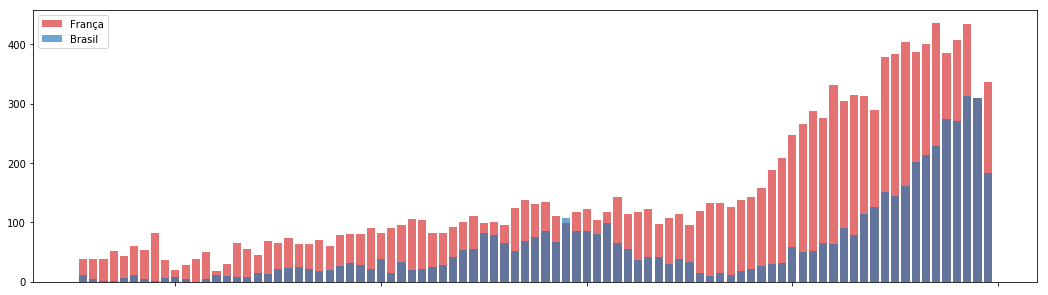

In [164]:
plot_serie2([df_feafr, df_feabr],['França', 'Brasil'], True, 'BrasilxFrança', Brasil = False, invisible_x=True)

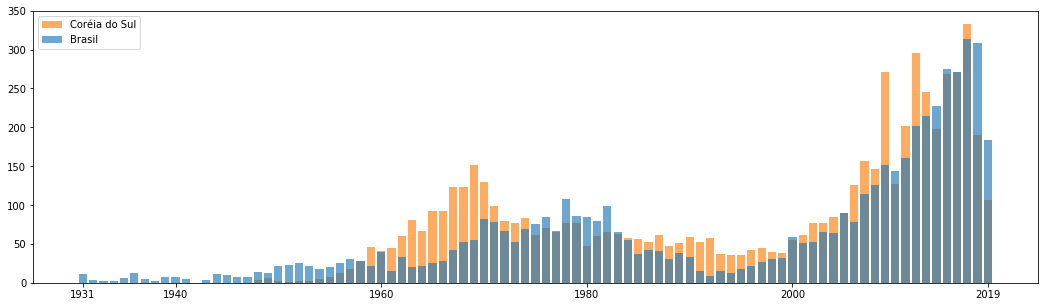

In [165]:
plot_serie2([df_feakr, df_feabr],['Coréia do Sul', 'Brasil'], True, 'Brasil x Korea', Brasil=False, invisible_x=False)

In [9]:
def plot_serie_comp(df, savefig, title):

    feature_films = []
    years = np.arange(1931, 2020)
    for year in years:
        try:
            feature_films.append(df.groupby('year').get_group(year).shape[0])
        except:
            feature_films.append(0)
    support = (np.concatenate([fea_wr, np.array([1])], axis=0)/np.concatenate([np.array([1]), fea_wr], axis=0))[1:-1]
    vec = [feature_films[0]]
    for i in range(len(support)):
        vec.append(vec[i]*support[i])

    f, ax = plt.subplots(figsize=(18,5))
    plt.bar(years, feature_films, label='Brasil')
    plt.bar(years, vec, label='Se o Brasil seguisse\na tendência mundial', alpha=0.7)
    plt.title(title)
    if (savefig==True):
        plt.savefig(title+'.png', dpi=300)
    plt.legend()
    return vec
    

In [10]:
color = pd.DataFrame(data={'country':['Mundo', 'Brasil', 'França', 'Korea'], 'color':['tab:green', 'tab:blue', \
             
                                                                                          'tab:red', 'tab:orange']})

In [278]:
def cum_films2(dfs, labels, savefig, title):
    years = np.arange(1931, 2020)
    f, ax = plt.subplots(figsize=(18,5))
    feature_films = []
    years = np.arange(1931, 2020)
    color = pd.DataFrame(data={'country':['Mundo', 'Brasil', 'França', 'Korea'], 'color':['mediumseagreen', 'tab:blue', \
             
                                                                                          'tab:red', 'tab:orange']})
    feature = []
    for df in dfs:
        feature_films = []
        for year in years:
            try:
                feature_films.append(df.groupby('year').get_group(year).shape[0])
            except:
                feature_films.append(0)
        feature.append(feature_films)
    a = []
    for i in range(len(dfs)):
        plt.bar(years, np.cumsum(feature[i])*100/(np.cumsum(feature[i])[-1]), label=labels[i], alpha = 0.85-i*0.2, color=color[color.country==labels[i]].color)
        a.append(np.cumsum(feature[i])/(np.cumsum(feature[i])[-1]).tolist())
    plt.legend()
    plt.ylabel('%')
    xticksli = np.arange(1940,2020, 20)
    xticksli = np.insert(xticksli, 0, 1931)
    xticksli = np.insert(xticksli, len(xticksli), 2019)
    plt.xticks(xticksli)
    if (savefig):
        plt.savefig(title+'png', dpi=300)
    #plt.title("Filmes acumulados\n")
    return a
    

In [17]:
def cum_films_vec(dfs, labels):
    years = np.arange(1931, 2020)
    feature_films = []
    years = np.arange(1931, 2020)
    feature = []
    for df in dfs:
        feature_films = []
        for year in years:
            try:
                feature_films.append(df.groupby('year').get_group(year).shape[0])
            except:
                feature_films.append(0)
        feature.append(feature_films)
    return a
    

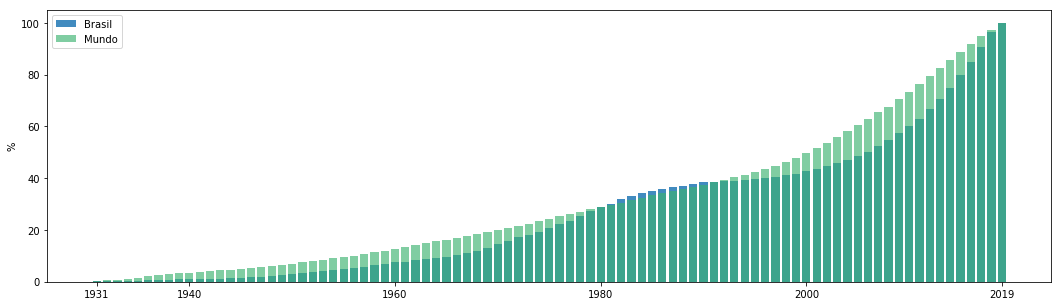

In [18]:
a = cum_films2([df_feabr, df_feafr], ['Brasil', 'Mundo'], False, 'BrasilMundo')

([<matplotlib.axis.XTick at 0x1a291d9dd8>,
 <a list of 19 Text xticklabel objects>)

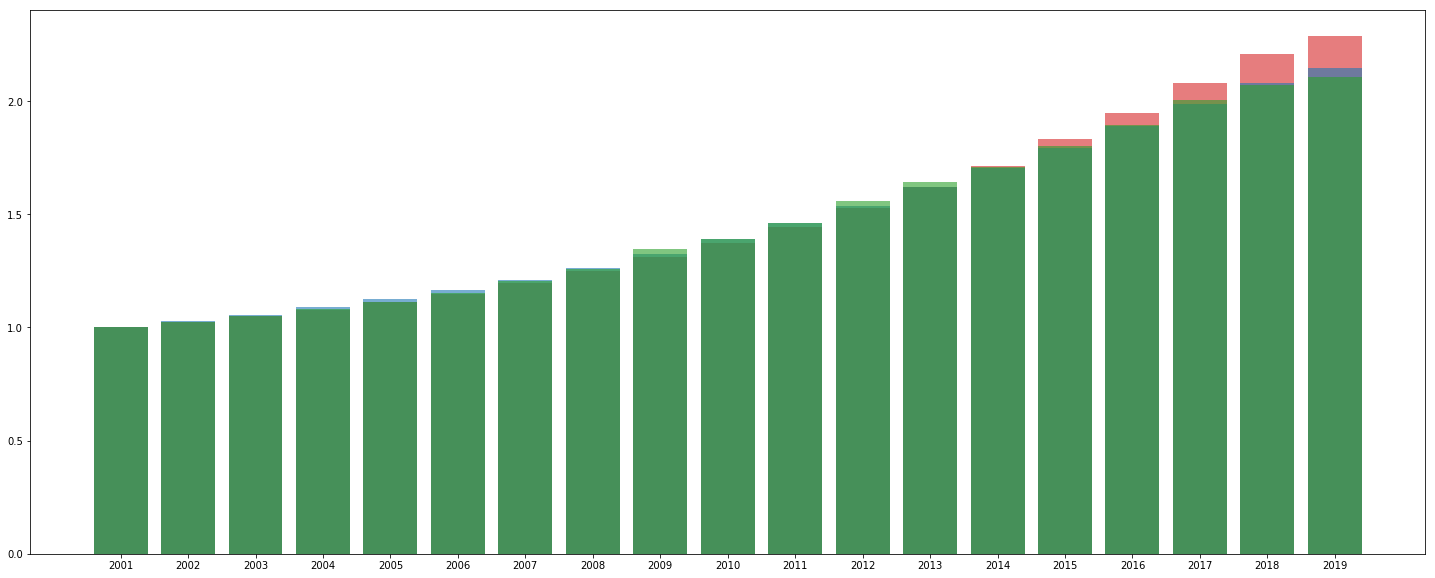

In [461]:
labels = ['Korea', 'Brasil', 'Mundo']
colors = ['tab:red', 'tab:blue', 'tab:green']
fig, ax = plt.subplots(figsize=(25, 10))
for i in range(len(df.values)):
    ax.bar(np.arange(2001, 2020), df.values[i], alpha=.6, label = labels[i], color=colors[i])
plt.xticks(np.arange(2001, 2020))

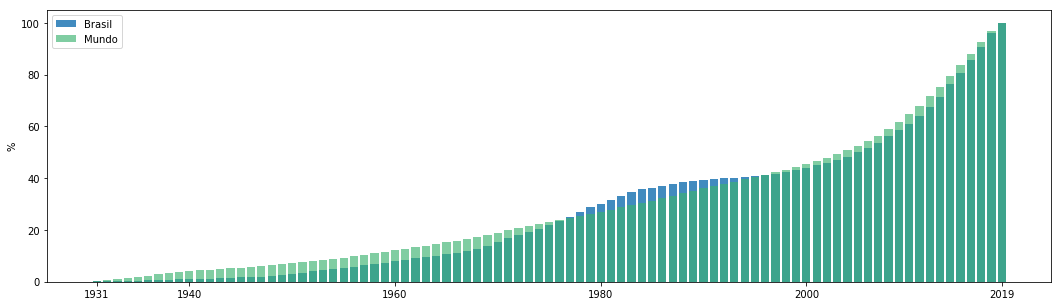

In [337]:
a = cum_films2([df_brnov, df_feawr], ['Brasil', 'Mundo'], True, 'MundoxBrasil1011')

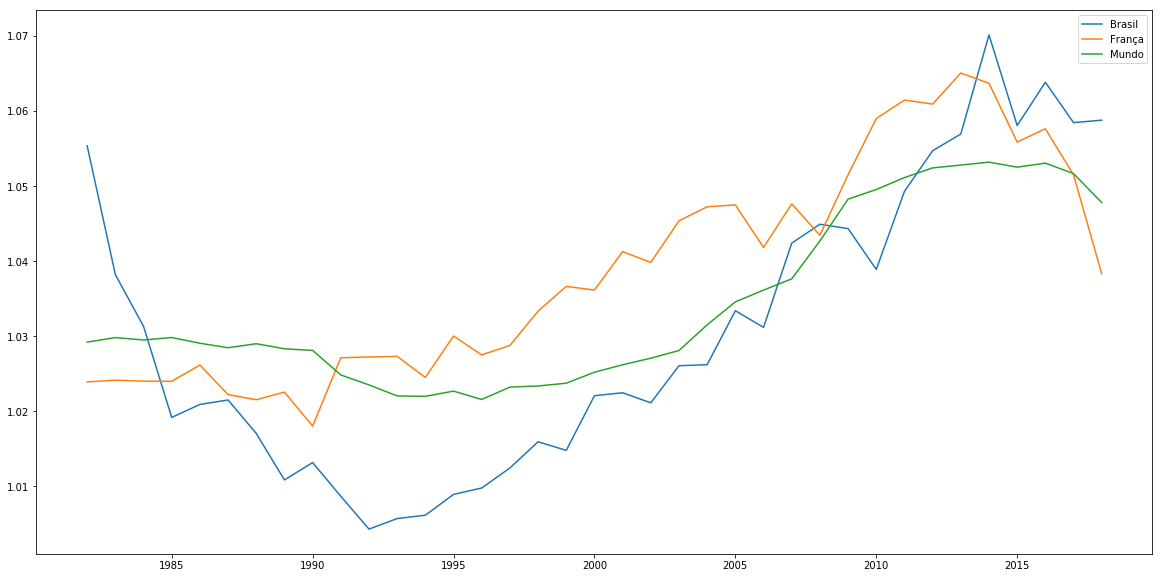

In [276]:
growth([df_brnovfinal, df_feafr[(df_feafr.imdb_rating!=0) & (df_feafr.imdb_rating!='None')], \
        df_feawr], ['Brasil', 'França', 'Mundo'], savefig=True, title='Growth')

## Crítica

In [185]:
def mean_critics(df, label, savefig):
    df_feabr = df
    color = pd.DataFrame(data={'country':['Mundo', 'Brasil', 'França', 'Korea'], 'color':['tab:green', 'tab:blue', \
             
                                                                                          'tab:red', 'tab:orange']})
    x, metacritics = [], []
    for name, group in df_feabr[((df_feabr.metascore!=0) & (df_feabr.metascore!='None')) & (df_feabr.year>=2001)].groupby('year'):
        x.append(name)
        metacritics.append(group.metascore.astype(int).mean())

    f, ax = plt.subplots(figsize=(13,13))
    plt.bar(x,metacritics, label=label, width=.5, color = color[color.country==label].color)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, metacritics)

    print('slope = ', slope.round(2))
    print('R = ', r_value.round(2))
    print('p = ', p_value.round(2))
    plt.xticks(np.arange(2002, 2020))
    plt.legend()
    plt.plot(np.arange(2001, 2021), np.arange(2001, 2021)*slope+intercept, linestyle=':', color='grey')
    plt.ylim(0,88)
    plt.legend()
    if (savefig):
        plt.savefig('MeanCritics'+label+'.png', dpi=300)
    

In [13]:
def mean_critics2(df, label, savefig, title):
    df_feabr = df
    alpha=0.65
    color = pd.DataFrame(data={'country':['Mundo', 'Brasil', 'França', 'Korea'], 'color':['tab:green', 'tab:blue', \
             
                                                                                          'tab:red', 'tab:orange']})
    x, metacritics = [], []
    for name, group in df_feabr[((df_feabr.metascore!=0) & (df_feabr.metascore!='None')) & (df_feabr.year>2001)].groupby('year'):
        x.append(name)
        metacritics.append(group.metascore.astype(int).mean())
    if (label=='Brasil'):
        a = metacritics[np.arange(2002, 2020).tolist().index(2008)]
        metacritics = np.insert(np.array(metacritics), np.arange(2002, 2020).tolist().index(2008), a)

    vec = metacritics

    vec2 = [(vec[i]+vec[i+1])/2 for i in range(0, len(vec)-1, 2)]
    
    f, ax = plt.subplots(figsize=(11.5,10))
    x = np.arange(2002, 2020, 2).astype(str)
    plt.bar(np.arange(len(x)),vec2, label=label, width=.5, color = color[color.country==label].color, alpha=alpha)
    slope, intercept, r_value, p_value, std_err = stats.linregress(np.arange(len(x)), vec2)

    print('slope = ', slope.round(2))
    print('R = ', r_value.round(2))
    print('p = ', p_value.round(2))
    plt.xticks(np.arange(len(x)), ['2001-2003', '2004-2005', '2006-2007', '2008-2009', \
                                   '2010-2011', '2012-2013', '2014-2015', '2016-2017', '2018-2019'])
    plt.legend()
    plt.plot(np.arange(-.5, len(x),1), np.arange(-.5, len(x), 1)*slope+intercept, linestyle=':', color='grey')
    plt.ylim(0,95)
    plt.ylabel('Nota média da crítica especializada\n')
    plt.legend(fontsize=10)
    bbox_props = dict(boxstyle='square', fc='white')
    ax.text(-0.7, 90, 'p = '+str(p_value.round(3))+'\nR = '+str(r_value.round(3)),size=11, fontdict={'family':'Helvetica'}, bbox=bbox_props)
    if (savefig):
        plt.savefig('MeanCritics'+title+'.png', dpi=300, bbox_inches='tight')
    return vec2



In [168]:
def mean_critics3(df, label, savefig, title):
    
    alpha=0.65
    color = pd.DataFrame(data={'country':['Mundo', 'Brasil', 'França', 'Korea'], 'color':['tab:green', 'tab:blue', \
             
                                                                                          'tab:red', 'tab:orange']})
    metacritics = [df[(df.year>2001) & (df.year<=2003) & (df.metascore!=0) & (df.metascore!='None')].metascore.astype(int).mean()]
    print(metacritics)
    years_range = np.arange(2004, 2020, 2)
    for i in years_range:
        metacritics.append(df[(df.year>=i) & (df.year<=i+1) & (df.metascore!=0) & (df.metascore!='None')].metascore.astype(int).mean())
        
    
    f, ax = plt.subplots(figsize=(11.5,10))
    x = np.arange(2002, 2020, 2).astype(str)
    plt.bar(np.arange(len(x)),metacritics, label=label, width=.5, color = color[color.country==label].color, alpha=alpha)
    slope, intercept, r_value, p_value, std_err = stats.linregress(np.arange(len(x)), metacritics)

    print('slope = ', slope.round(2))
    print('R = ', r_value.round(2))
    print('p = ', p_value.round(2))
    plt.xticks(np.arange(len(x)), ['2001-2003', '2004-2005', '2006-2007', '2008-2009', \
                                   '2010-2011', '2012-2013', '2014-2015', '2016-2017', '2018-2019'])
    plt.legend()
    plt.plot(np.arange(-.5, len(x),1), np.arange(-.5, len(x), 1)*slope+intercept, linestyle=':', color='grey')
    plt.ylim(0,95)
    plt.ylabel('Nota média da crítica especializada\n')
    plt.legend(fontsize=10)
    bbox_props = dict(boxstyle='square', fc='white')
    ax.text(-0.7, 90, 'p = '+str(p_value.round(3))+'\nR = '+str(r_value.round(3)),size=11, fontdict={'family':'Helvetica'}, bbox=bbox_props)
    if (savefig):
        plt.savefig('MeanCritics'+title+'.png', dpi=300, bbox_inches='tight')
    return metacritics



slope =  1.94
R =  0.77
p =  0.01


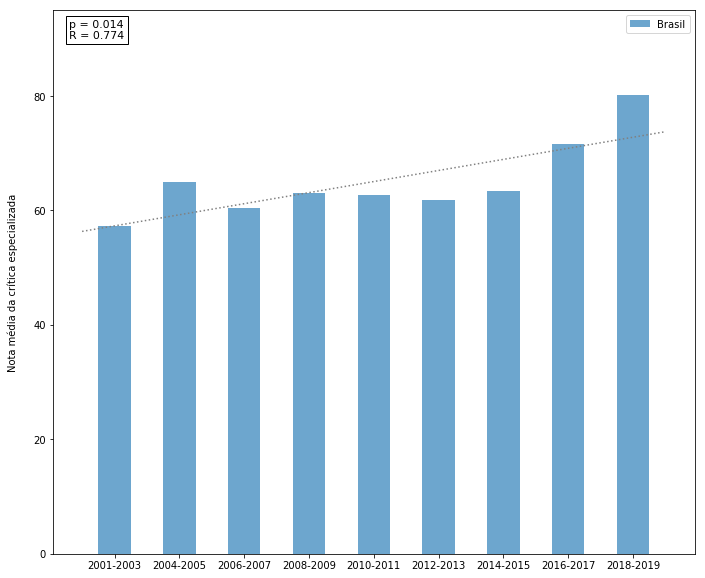

In [236]:
a = mean_critics3(df_feabr, 'Brasil', True, 'MeanCritics1311')

In [258]:
df = df_feakr
df[(df.year>2001) & (df.year<=2003) & (df.metascore!=0) & (df.metascore!='None')].metascore.values.astype(int).mean()

68.41666666666667

[68.41666666666667]
slope =  0.09
R =  0.06
p =  0.88


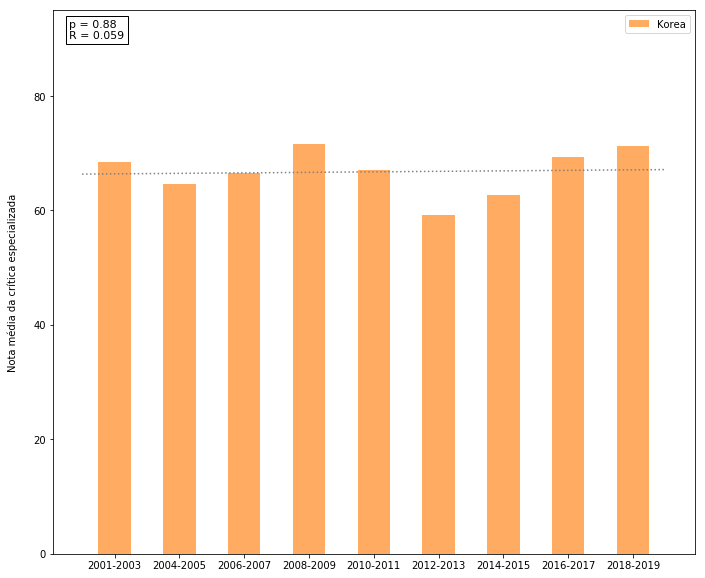

In [263]:
a = mean_critics3(df_feakr, 'Korea', True, 'MeanCritics1311')

slope =  -0.12
R =  -0.21
p =  0.39


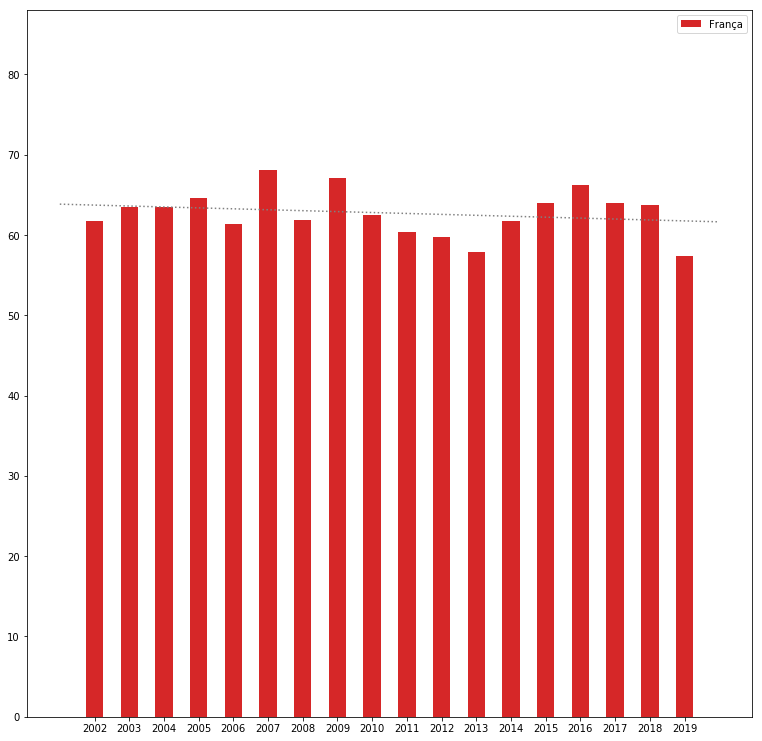

In [261]:
mean_critics(df_feafr, 'França', False)

slope =  0.02
R =  0.02
p =  0.95


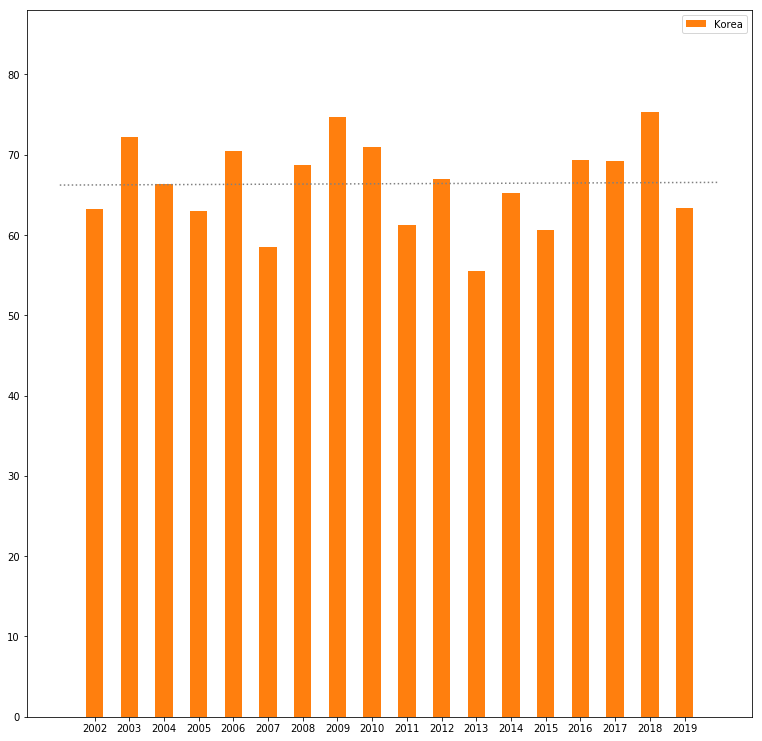

In [263]:
mean_critics(df_feakr, 'Korea', False)

In [509]:
df_feabr[(df_feabr.metascore!=0) & (df_feabr.year>2001)].sort_values(by='metascore').to_csv('Notas.csv')

In [502]:
df_feakr[(df_feakr.metascore!='None') & (df_feakr.year>2001)].shape

(92, 26)

In [ ]:
df_feabr[df_fea]

slope =  0.78
R =  0.5
p =  0.04


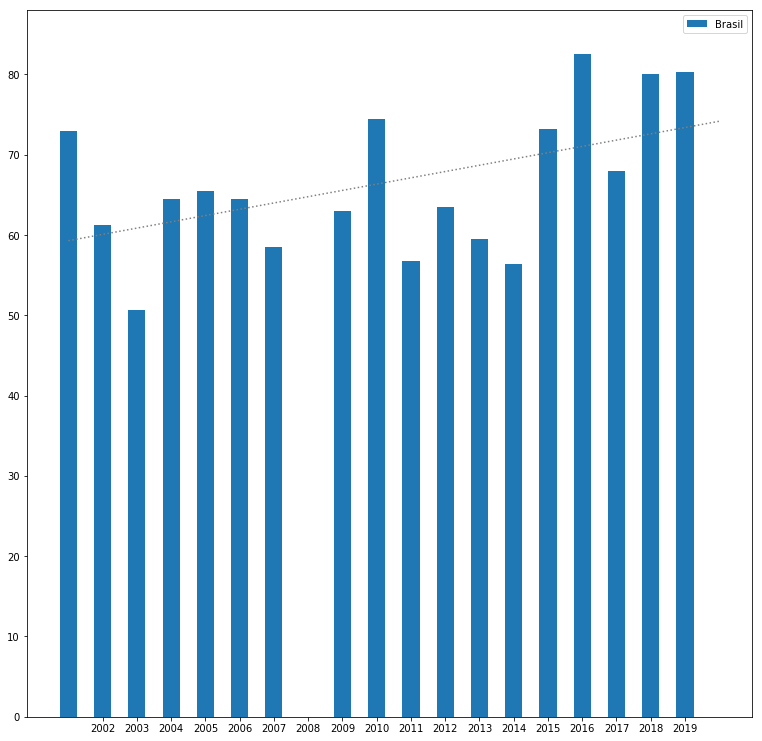

In [186]:
mean_critics(df_feabr, 'Brasil', False)

In [92]:
def minmax(df):
    years, mini, maxi = [], [], []
    df_feafr = df
    y = []
    for name, group in df_feafr[(df_feafr.metascore!='None') & (df_feafr.metascore!=0)].groupby('year'):
        years.append(name)
        mini = group.metascore.min()
        maxi = group.metascore.max()
        years.append(name)
        y.append([[group[group.metascore==mini].title.values[0], mini], [group[group.metascore==maxi].title.values[0], maxi], name])    
    years = np.unique(np.array(years))

    mins = [i[0][1] for i in y]
    maxs = [i[1][1] for i in y]

    names_mins = [i[0][0] for i in y]
    names_maxs = [i[1][0] for i in y]

    years_mins = years.tolist()
    years_maxs = years.tolist()
    minmax = pd.DataFrame(data={'year': years, 'mins':mins, 'title_min':names_mins, 'maxs':maxs, 'title_max':names_maxs})
    return minmax
    

In [486]:
years, mini, maxi = [], [], []
y = []
for name, group in df_feafr[df_feafr.metascore!='None'].groupby('year'):
    years.append(name)
    mini = group.metascore.min()
    maxi = group.metascore.max()
    years.append(name)
    y.append([[group[group.metascore==mini].title.values[0], mini], [group[group.metascore==maxi].title.values[0], maxi], name])    
years = np.unique(np.array(years))

mins = [i[0][1] for i in y]
maxs = [i[1][1] for i in y]

names_mins = [i[0][0] for i in y]
names_maxs = [i[1][0] for i in y]

years_mins = years.tolist()
years_maxs = years.tolist()

In [487]:
minmax = pd.DataFrame(data={'year': years, 'mins':mins, 'title_min':names_mins, 'maxs':maxs, 'title_max':names_maxs})
minmax.head()

,year,mins,title_min,maxs,title_max
0,1937,98,Pépé le Moko,98,Pépé le Moko
1,1946,92,Beauty and the Beast,92,Beauty and the Beast
2,1947,89,Quai des Orfèvres,89,Quai des Orfèvres
3,1952,87,The King and the Mockingbird,87,The King and the Mockingbird
4,1954,85,Touchez Pas au Grisbi,85,Touchez Pas au Grisbi


In [488]:
df_mm = minmax[(minmax.title_min!=minmax.title_max) & (minmax.year>2001)]

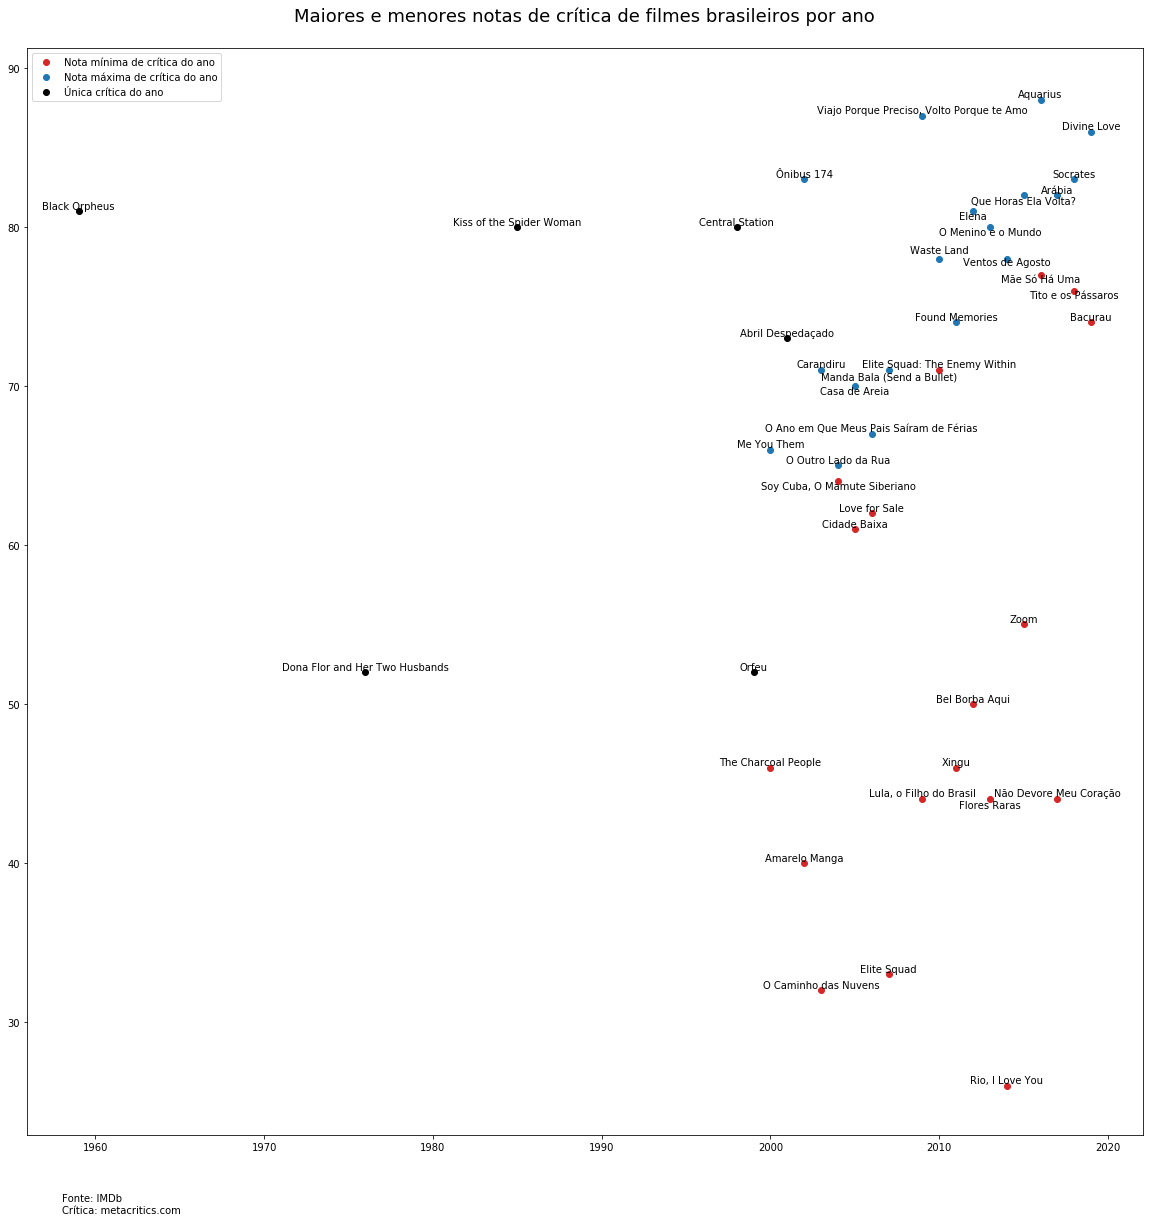

In [236]:
df_mm = minmax[minmax.title_min!=minmax.title_max]
df_com = minmax[minmax.title_min==minmax.title_max]
f, ax = plt.subplots(figsize=(20,20))
plt.scatter(df_mm.year, df_mm.mins, color='tab:red', label='Nota mínima de crítica do ano')
plt.scatter(df_mm.year, df_mm.maxs, color='tab:blue', label='Nota máxima de crítica do ano')
plt.scatter(df_com.year, df_com.maxs, color='black', label='Única crítica do ano')
texts=[]
for i in range(df_mm.shape[0]):
    texts.append(plt.text(df_mm.year.values[i], df_mm.mins.values[i], df_mm.title_min.values[i]))
    texts.append(plt.text(df_mm.year.values[i], df_mm.maxs.values[i], df_mm.title_max.values[i]))
for i in range(df_com.shape[0]):
    texts.append(plt.text(df_com.year.values[i], df_com.maxs.values[i], df_com.title_max.values[i]))
adjust_text(texts, x=x, y=y, autoalign='y',
            only_move={'points':'y', 'text':'y'}, force_points=0.25)
plt.title('Maiores e menores notas de crítica de filmes brasileiros por ano\n', size=18)
plt.text(x=1958, y=18, s='Fonte: IMDb\nCrítica: metacritics.com', fontsize=10, ha="left")
plt.legend(loc='upper left')
#plt.savefig('NotasCrítica.png', dpi=400)

In [287]:
df_mm.title_max.values

array(['To Be and to Have', 'The Triplets of Belleville', "L'intrus",
       'Caché', 'Tell No One', 'The Diving Bell and the Butterfly',
       '35 Shots of Rum', 'A Prophet', 'Carlos', 'The Artist',
       'Ernest & Celestine', 'Blue Is the Warmest Color',
       'National Gallery', 'Trois souvenirs de ma jeunesse', 'Paterson',
       'Faces Places', 'John McEnroe: In the Realm of Perfection',
       'Portrait de la jeune fille en feu'], dtype=object)

In [327]:
df_mm = pd.read_csv('MINMAX-PR.csv')

In [161]:
df_mm.title_max.to_csv('maxs.csv')

/Users/leozeine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [328]:
df_mm.head()

,Unnamed: 0,year,mins,title_min,maxs,title_max
0,NaN,2001,73,Abril Despedaçado,73,Abril Despedaçado
1,7.0,2002,40,Amarelo Manga,83,Ônibus 174
2,8.0,2003,32,O Caminho das Nuvens,71,Carandiru
3,9.0,2004,64,"Soy Cuba, O Mamute Siberiano",65,O Outro Lado da Rua
4,10.0,2005,61,Cidade Baixa,70,Casa de Areia


In [136]:
def maxs_names(df):
    df_mm = df
    f, ax = plt.subplots(figsize=(13,11.3))
    plt.scatter(df_mm.year, df_mm.maxs, color='tab:blue')
    texts=[]
    for i in range(df_mm.shape[0]):
        texts.append(plt.text(df_mm.year.values[i], df_mm.maxs.values[i]+.2, df_mm.title_max.values[i],  fontsize=11))

    adjust_text(texts, x=x, y=y, autoalign='y',
                only_move={'points':'y', 'text':'y'}, force_points=0.45)
    plt.xticks(np.arange(2001, 2020))
    plt.yticks(np.arange(60, df_mm.maxs.max()+5, 5))
    plt.ylim(df_mm.maxs.min()-5, df_mm.maxs.max()+5)
    plt.xlim(2000, 2020.5)
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_mm.year, df_mm.maxs)
    plt.plot(np.arange(2001, 2021), np.arange(2001, 2021)*slope+intercept, linestyle='--', color='black', alpha=0.5)
    bbox_props = dict(boxstyle='square', fc='white')
    plt.text(x=2001.5, y=df_mm.maxs.min()-9, s='Fonte: IMDb\nCrítica: metacritics.com', fontsize=10, ha="left")
    ax.text(2018, df_mm.maxs.min()-3, 'p = '+str(p_value.round(3))+'\nR = '+str(r_value.round(3)),size=11, fontdict={'family':'Helvetica'}, bbox=bbox_props)
    

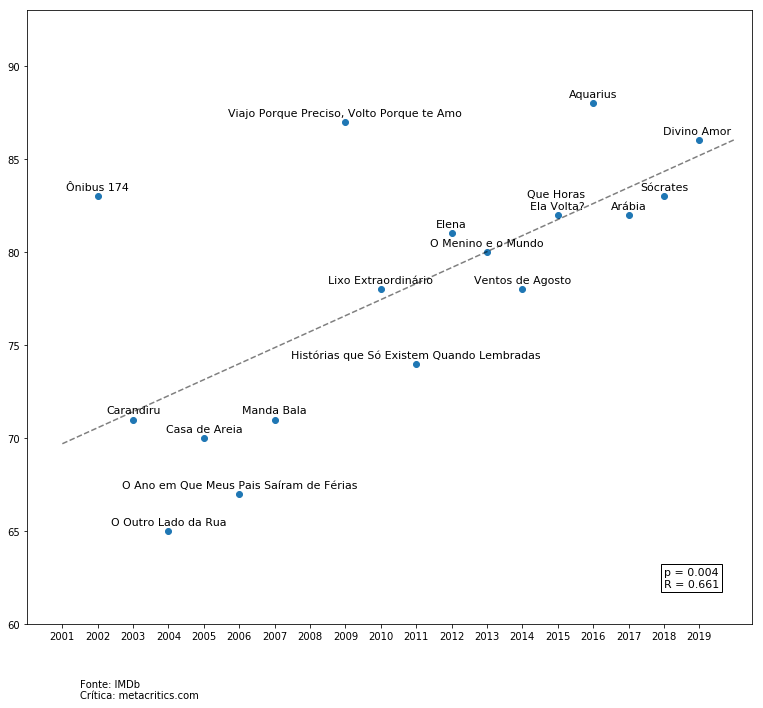

In [137]:
maxs_names(pd.read_csv('MINMAX-PR.csv'))

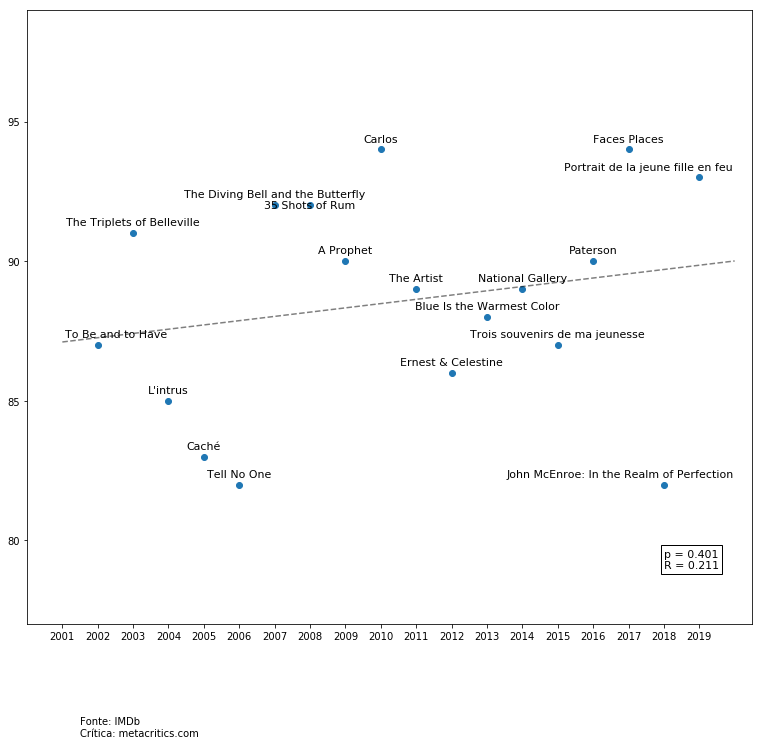

In [138]:
maxs_names(pd.read_csv('MinMaxFr.csv'))

In [304]:
df_mmfr = pd.read_csv('MinMaxFr.csv')

In [570]:
df_mm = minmax[(minmax.title_min!=minmax.title_max) & (minmax.year>2001)]

In [567]:
df_mm

,year,mins,title_min,maxs,title_max
40,2001,33,Original Sin,88,Time Out
41,2002,22,Merci Docteur Rey,87,To Be and to Have
42,2003,40,Kaena: The Prophecy,91,The Triplets of Belleville
43,2004,29,Anatomy of Hell,85,L'intrus
44,2005,25,Revolver,83,Caché
45,2006,39,Arthur and the Invisibles,82,Tell No One
46,2007,35,Hitman,92,The Diving Bell and the Butterfly
47,2008,26,Babylon A.D.,92,35 Shots of Rum
48,2009,47,Home,90,A Prophet
49,2010,39,Four Lovers,94,Carlos


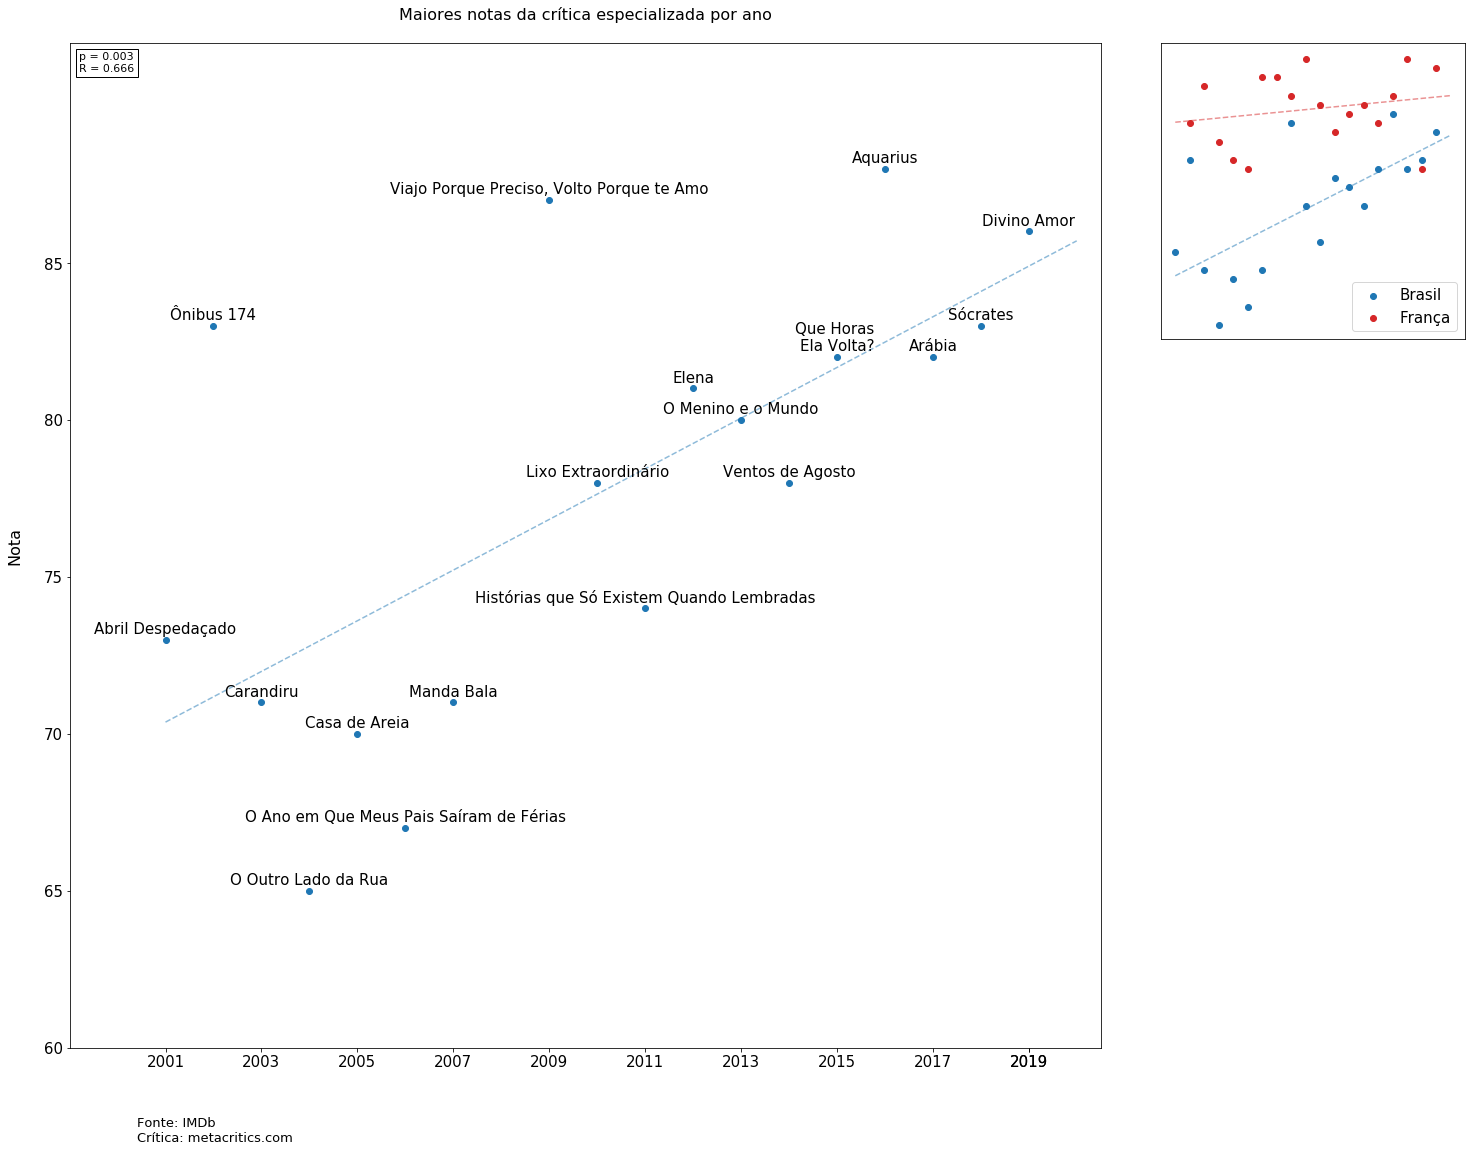

In [333]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(25, 25), facecolor='w', edgecolor='k')

gridspec.GridSpec(4,4)
plt.subplot2grid((4,4), (0,0), colspan=3, rowspan=3)
plt.scatter(df_mm.year, df_mm.maxs, color='tab:blue')

texts=[]
for i in range(df_mm.shape[0]):
    plt.text(df_mm.year.values[i], df_mm.maxs.values[i]+.2, df_mm.title_max.values[i],  fontsize=15, horizontalalignment='center')

'''adjust_text(texts, x=x, y=y, autoalign='y',
            only_move={'points':'y', 'text':'y'}, force_points=0.45)'''
slope, intercept, r_value, p_value, std_err = stats.linregress(df_mm.year, df_mm.maxs)
plt.text(1999.2, 91.1, 'p = '+str(p_value.round(3))+'\nR = '+str(r_value.round(3)),size=11, fontdict={'family':'Helvetica'}, bbox=bbox_props)
plt.plot(np.arange(2001, 2021), np.arange(2001, 2021)*slope+intercept, linestyle='--', color='tab:blue', alpha=.5)
plt.xticks(np.insert(np.arange(2001, 2020,2),9, 2019), fontsize=15)
#plt.grid(True, alpha=.4)
plt.yticks(np.arange(60 ,90, 5), fontsize=15)
plt.title('Maiores notas da crítica especializada por ano\n', fontsize=16)
plt.ylabel('Nota\n', fontsize=16)
plt.ylim(60, 92)
plt.xlim(1999, 2020.5)

bbox_props = dict(boxstyle='square', fc='white')
plt.text(x=2000.4, y=57, s='Fonte: IMDb\nCrítica: metacritics.com', fontsize=13, ha="left")
#plt.text(2017, 62, 'p = '+str(p_value.round(3))+'\nR = '+str(r_value.round(3)),size=11, fontdict={'family':'Helvetica'}, bbox=bbox_props, fontsize=14)


plt.subplot2grid((4,4), (0,3))
plt.scatter(df_mm.year, df_mm.maxs, color='tab:blue', label='Brasil')
slope, intercept, r_value, p_value, std_err = stats.linregress(df_mm.year, df_mm.maxs)
plt.plot(np.arange(2001, 2021), np.arange(2001, 2021)*slope+intercept, linestyle='--', color='tab:blue', alpha=.5)

plt.scatter(df_mmfr.year, df_mmfr.maxs, color='tab:red', label='França')
slope, intercept, r_value, p_value, std_err = stats.linregress(df_mmfr.year, df_mmfr.maxs)
plt.plot(np.arange(2001, 2021), np.arange(2001, 2021)*slope+intercept, linestyle='--', color='tab:red', alpha=.5)




plt.legend(fontsize=15)
plt.xticks([])
plt.yticks([])

plt.savefig('NotasMaximas-1011.png', dpi=200, bbox_inches='tight')

slope =  0.0
R =  0.16
p =  0.52


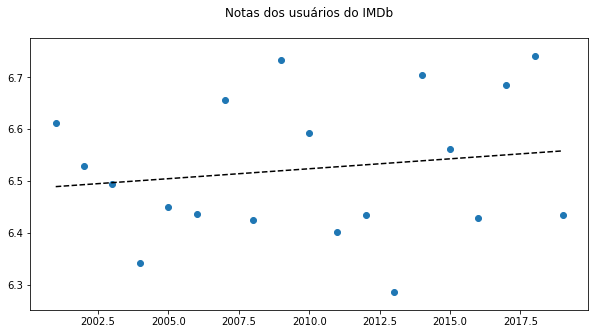

In [53]:
x, num_metacritics = [], []
for name, group in df_feabr[(df_feabr.year>2000) & (df_feabr.imdb_rating!=0)].groupby('year'):
    x.append(name)
    num_metacritics.append(group.imdb_rating.mean())
        

    #metacritics.append(group[group.metascore!=0].metascore.fillna(0).astype(int).values.mean())

f, ax = plt.subplots(figsize=(10,5))
plt.scatter(x, num_metacritics)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, num_metacritics)
print('slope = ', slope.round(2))
print('R = ', r_value.round(2))
print('p = ', p_value.round(2))
plt.plot(x, np.array(x)*slope+intercept, linestyle='--', color='black')
plt.title('Notas dos usuários do IMDb\n')
f.show()

## Gêneros

In [15]:
names = []
a = []
for name, group in df_feabr.groupby('year'):
    names.append(name)
    a.append(group.loc[:, 'Action':'War'].apply(pd.Series.value_counts).iloc[1,:].values)


In [27]:
notasf['Ação/Aventura/Fantasia/Guerra'] = notasf.Action+notasf.Adventure+notasf.Fantasy+notasf.War
notasf['Animação'] = notasf.Animation
notasf['Biografia/História'] = notasf.Biography+notasf.History
notasf['Comédia'] = notasf.Comedy
notasf['Crime/Horror/Thriller/Mistério'] = notasf.Crime+notasf.Horror+notasf.Thriller+notasf.Mystery
notasf['Documentário'] = notasf.Documentary
notasf['Ficção Científica'] = notasf['Sci-Fi']
notasf['Música/Musical'] = notasf.Music+notasf.Musical

In [66]:
colormaps = ['tab20']
#, 'tab10', 'tab20', 'tab20c', 'Set2']

In [160]:
def plot_genres(df, savefig, title, namefig):
    names = []
    a = []
    for name, group in df.groupby('year'):
        names.append(name)
        a.append(group.loc[:, 'Action':'War'].apply(pd.Series.value_counts).iloc[1,:].values)
    notas = pd.DataFrame(data=np.array(a), columns = df_feabr.loc[:, 'Action':'War'].columns, index = names)
    notasb = notas.loc[:, ~notas.columns.isin(['Western', 'Family', 'Sport'])]
    notasf = (notasb.div(notasb.sum(axis=1), axis=0)*100).fillna(0)
    notasf['Ação/Aventura/Fantasia/Guerra/Crime'] = notasf.Action+notasf.Adventure+notasf.Fantasy+notasf.War+notasf.Crime
    notasf['Animação'] = notasf.Animation
    notasf['Biografia/História'] = notasf.Biography+notasf.History
    notasf['Comédia'] = notasf.Comedy
    notasf['Horror/Thriller/Mistério'] = notasf.Horror+notasf.Thriller+notasf.Mystery
    notasf['Documentário'] = notasf.Documentary
    notasf['Ficção Científica'] = notasf['Sci-Fi']
    notasf['Música/Musical'] = notasf.Music+notasf.Musical
    
    plot_notas = notasf[['Ação/Aventura/Fantasia/Guerra/Crime', 'Animação', 'Biografia/História', 'Comédia', 'Horror/Thriller/Mistério', 'Documentário', 'Ficção Científica', 'Música/Musical', 'Romance', 'Drama']]
    plot = plot_notas.plot(kind='bar', stacked=True,figsize=(30,15), ylim=(0,100), width=0.89,colormap='tab20')
    
    handles, labels = plot.get_legend_handles_labels()
    #plot.set_axis_bgcolor("gray")
    plot.legend(reversed(handles), reversed(labels), bbox_to_anchor=(.99, -.05),
          fancybox=True, shadow=True, ncol=5, fontsize=22)
    
    '''bbox_to_anchor=(1,1.01), fontsize=20)'''
    
    
    '''
    plt.text(x=(.5), y=-55, s='\nEmbrafilme', fontsize=12, ha="center")
    plt.annotate('', xy=(.5, -.18), xycoords='axes fraction', xytext=((1990-1931)/(2019-1931), -0.18), 
            arrowprops=dict(arrowstyle="|-|", color='black'))

    plt.text(x=.5, y=-55, s='\nAncine', fontsize=12, ha="center")
    plt.annotate('', xy=(.5, -0.18), xycoords='axes fraction', xytext=(.97, -0.18),arrowprops=dict(arrowstyle="|-|", color='black'))
    '''
    plt.ylabel('%',fontsize=26)
    fig = plot.get_figure()
    plt.title(title, fontsize=28)
    if (savefig):
        fig.savefig(namefig, dpi=200, bbox_inches = 'tight')
    

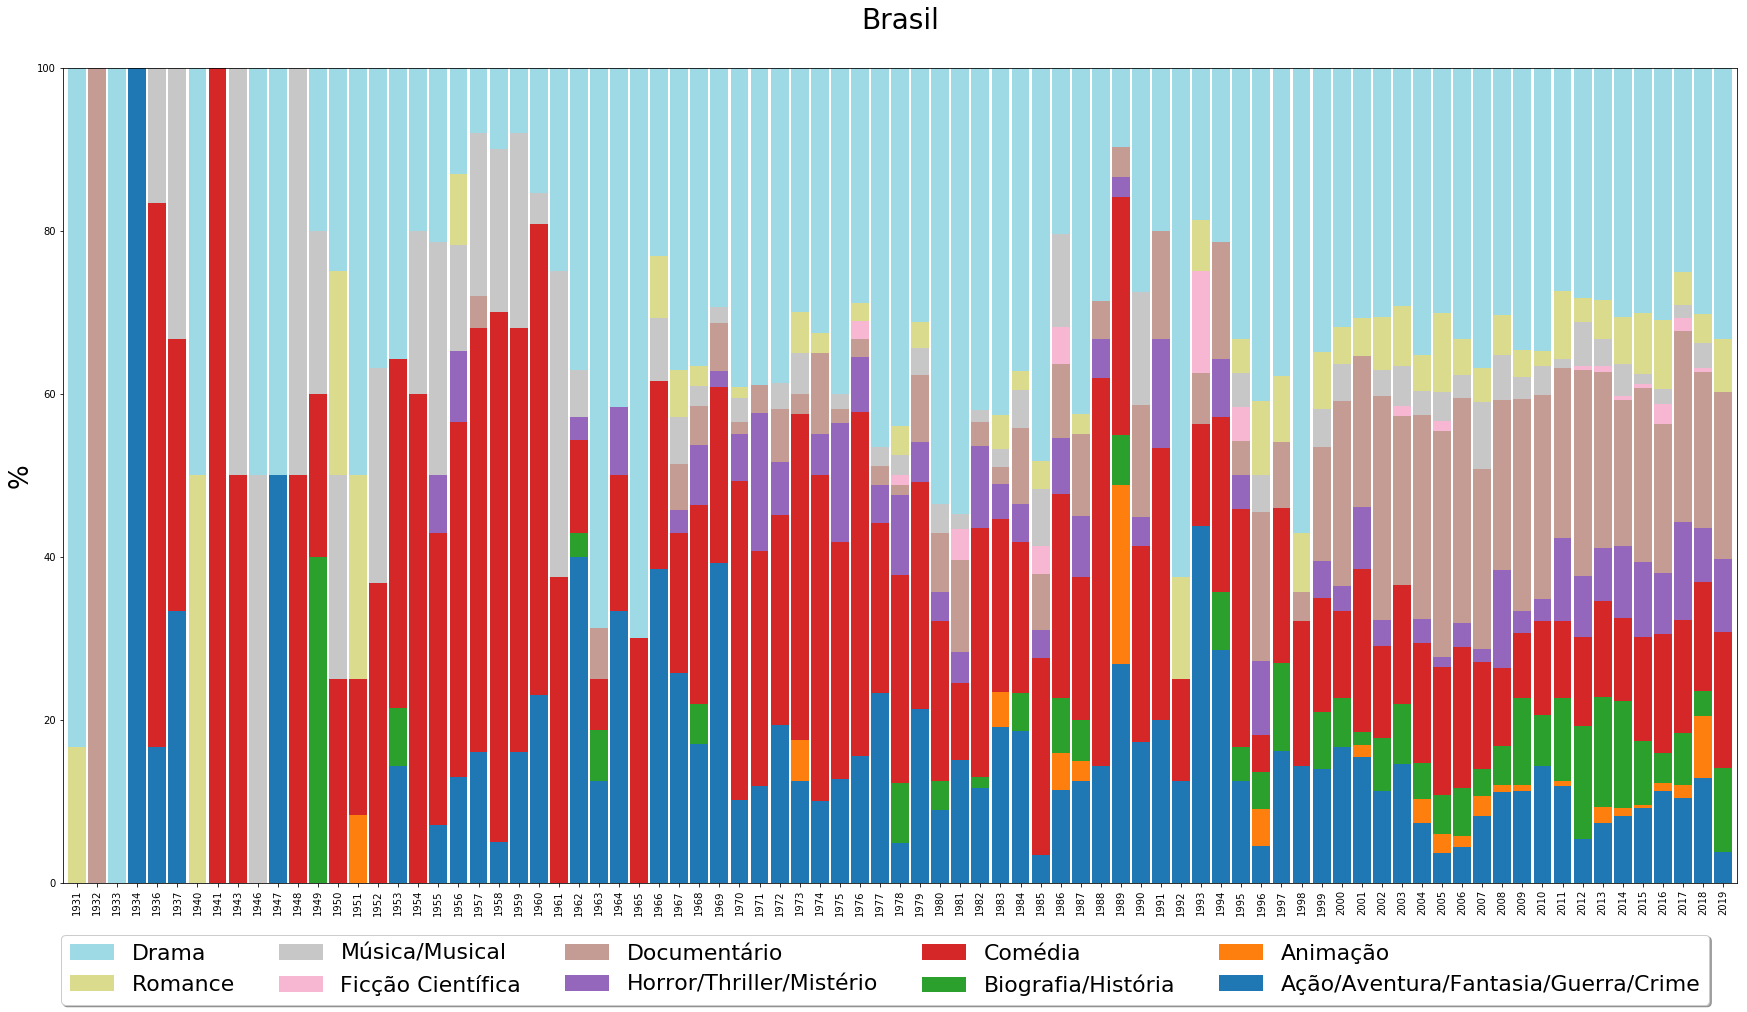

In [162]:
plot_genres(df_feabr[df_feabr.imdb_rating!=0],True,title='Brasil\n', namefig='1911')

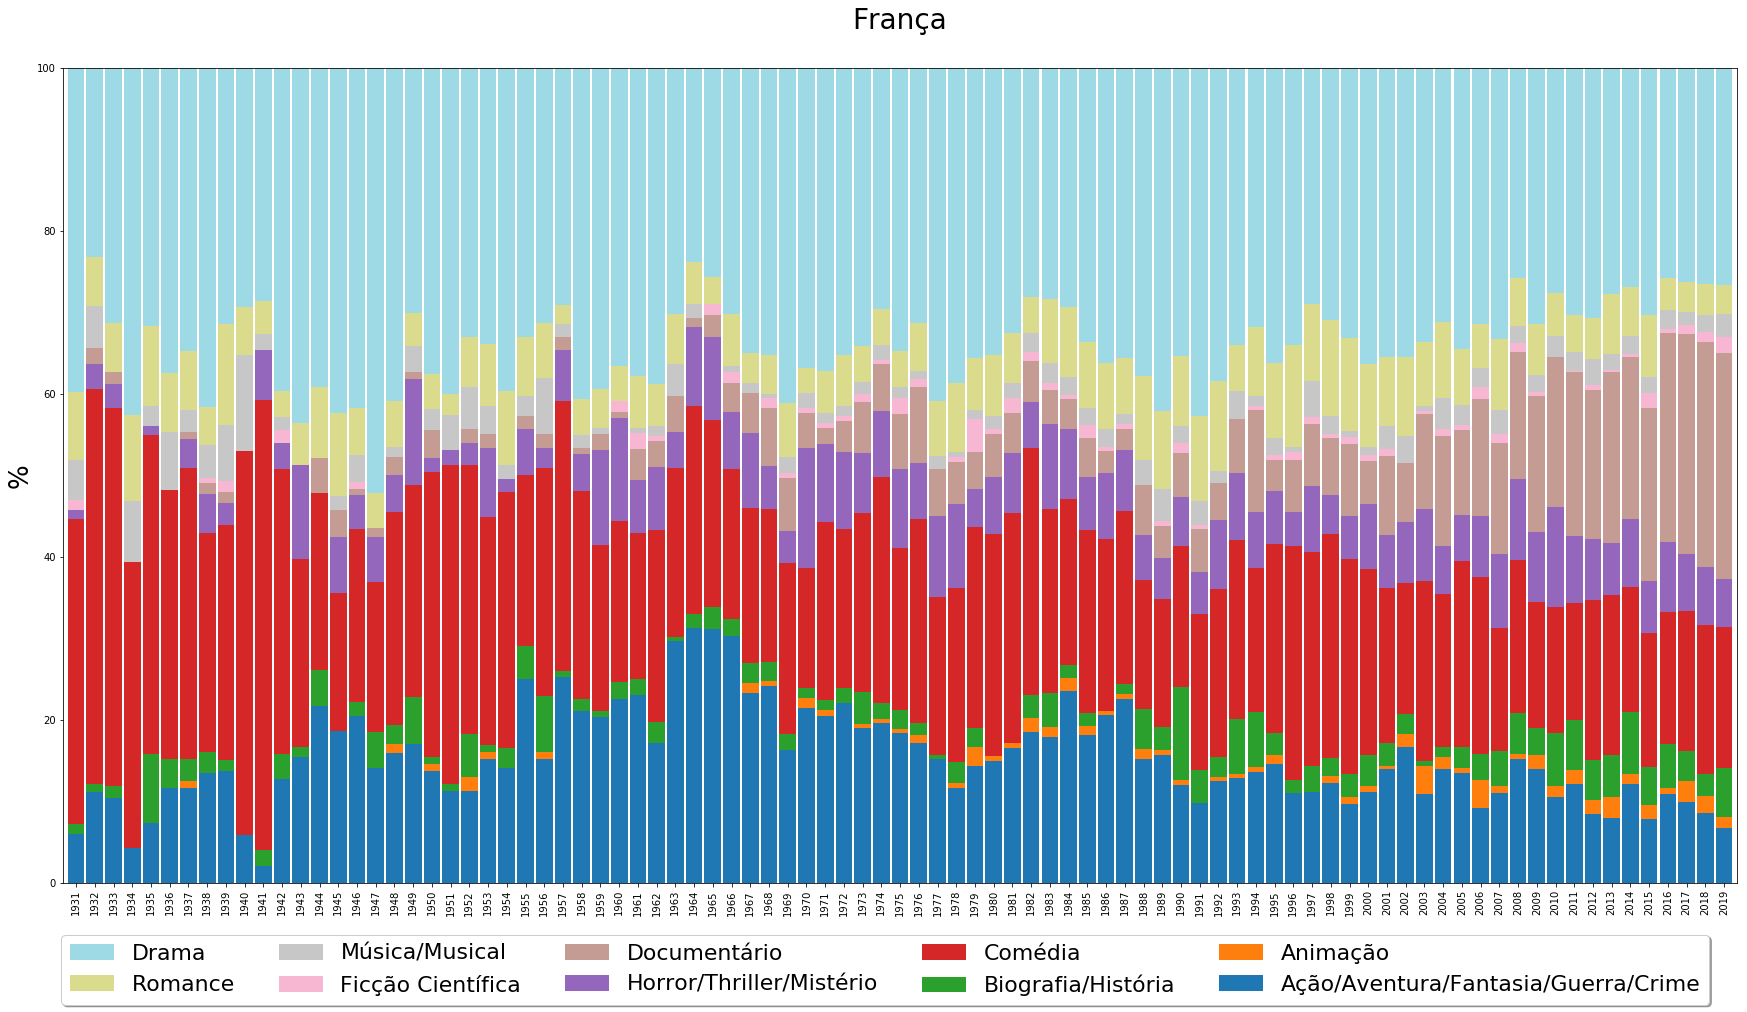

In [163]:
plot_genres(df_feafr[df_feafr.imdb_rating!=0], True, title='França\n', namefig='Fr1811')

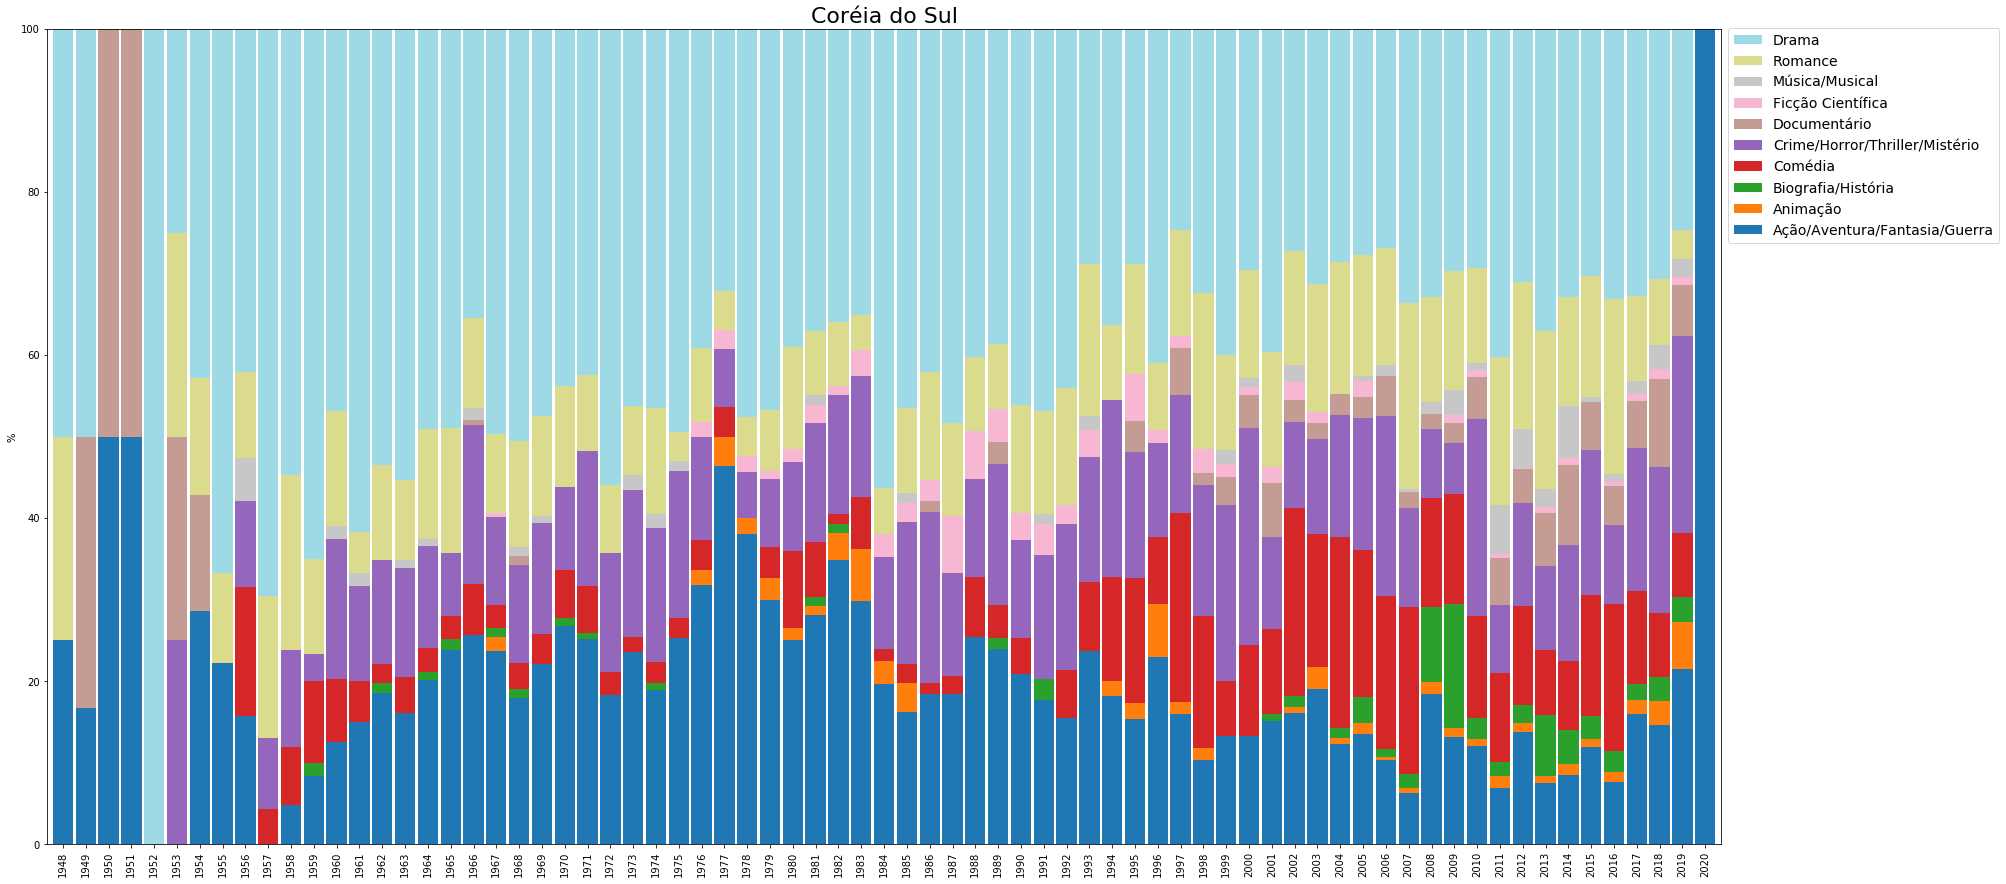

In [202]:
plot_genres(df_feakr, True, 'Coréia do Sul')

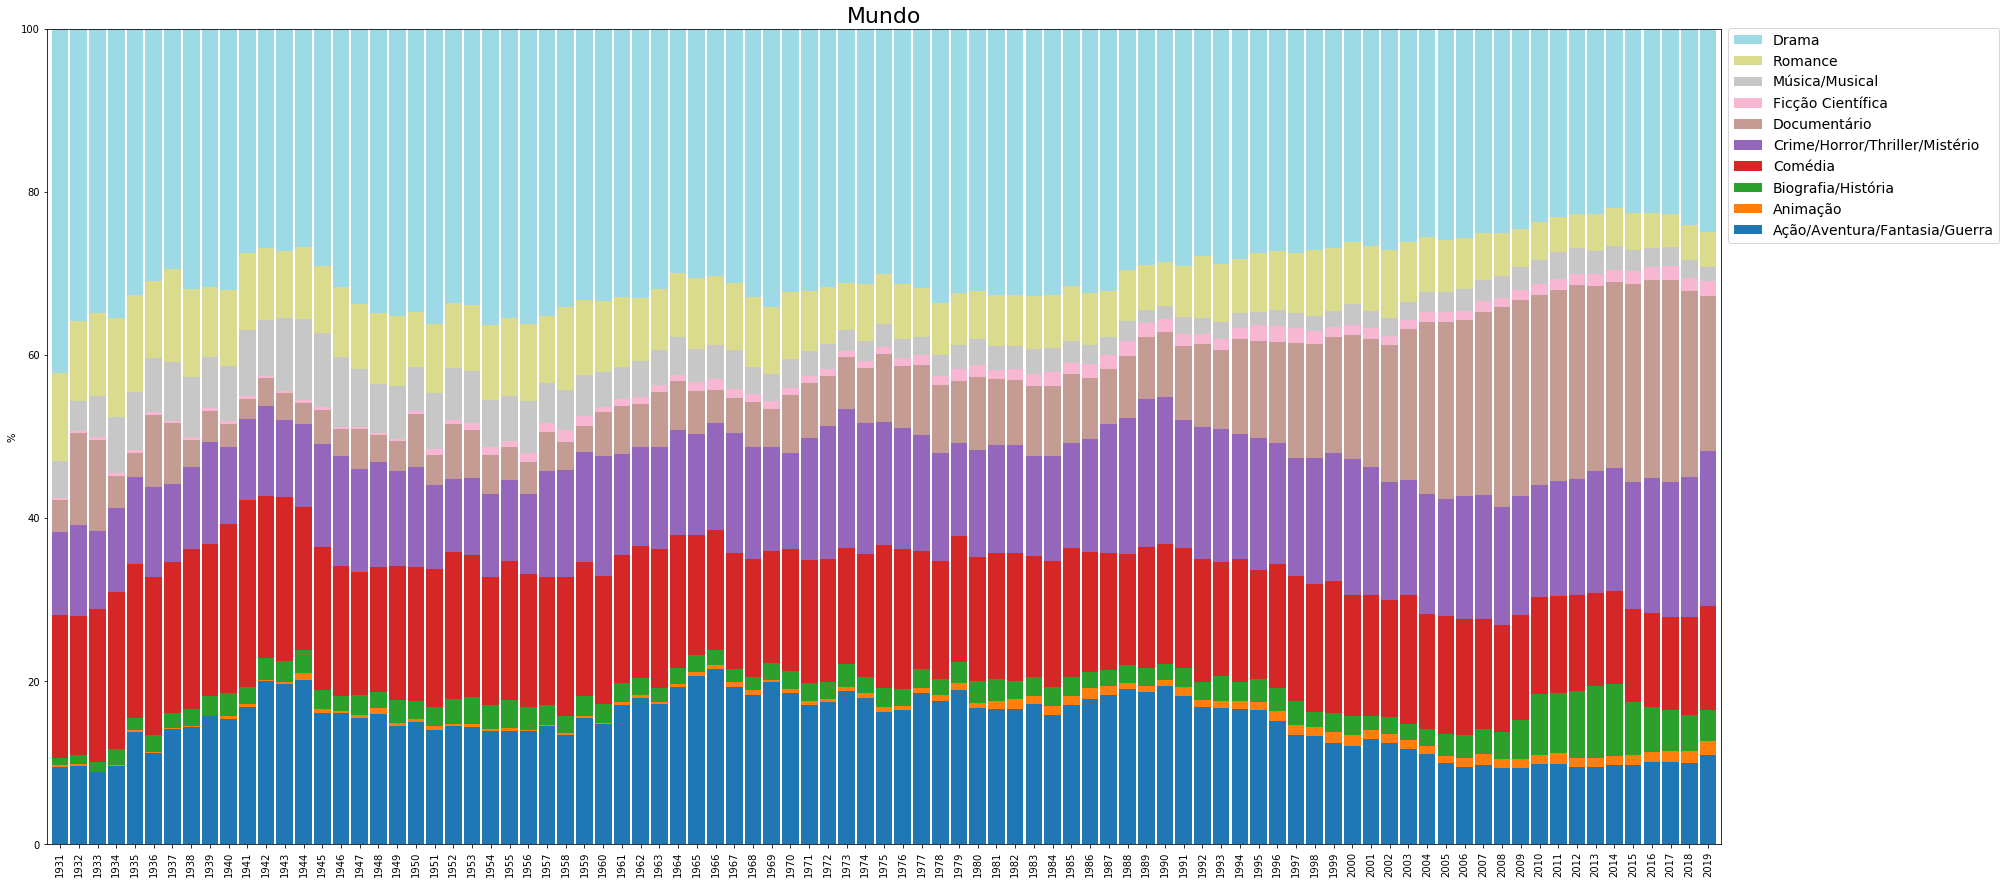

In [201]:
a = pd.concat([df_feawr.loc[:, 'Action':], df_feawr.year], axis=1)
a1 = a.loc[:,~a.columns.isin(['Adult', 'Film-Noir',  'Game-Show', 'News', 'Reality-TV','Short', 'Talk-Show','\\N', 'nan'])]
plot_genres(a1, True, 'Mundo')

In [192]:
df_feabr.loc[:,'Action':].columns

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'War', 'Western'],
      dtype='object')

In [14]:
def compare_csv(df):
    i =0
    remins = []
    for index, row in df.iterrows():
        try:
            df.loc[index,'originalTitle'] = df_feawr[(df_feawr.title==row['title']) | (df_feawr.originalTitle==row['title'])].title.values[0]
        except:
            print(row['title'])
            remins.append(row['title'])
            
    return df

In [ ]:
df = compare_csv(df_feabr)

In [114]:
df.to_csv('df_Compare.csv')

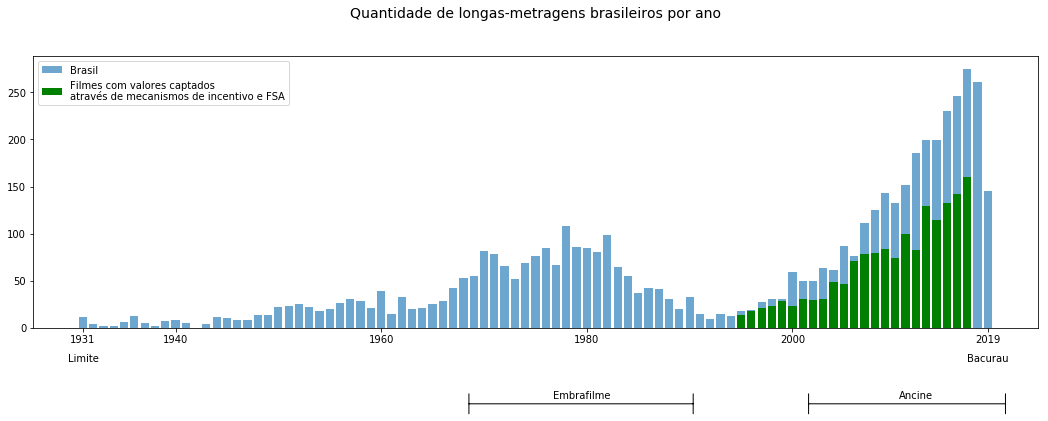

In [73]:
plot_serie2([df_feabr[df_feabr.originalTitle!=0]], ['Brasil'], False, 'BrasilAnciEmbra22Aqui', Brasil=True, invisible_x=False)


In [4]:
df_rotten = df_feabr[df_feabr.year>=2001]
df_rotten['rottenTitle'] = np.zeros(df_rotten.shape[0])

/Users/leozeine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Rotten Tomatoes

In [148]:
df_rotten = pd.read_csv('df_toma_tratado.csv')

In [149]:
df_rotten = df_rotten[df_rotten.total_count.fillna(0)!=0]
df_rotten.head()

,Unnamed: 0,title,year,metascore,imdb_rating,Action,Adventure,Animation,Biography,Comedy,...,Sci-Fi,Sport,Thriller,War,Western,rottenTitle,originalTitle,originalTitle2,tomatometer,total_count
0,0,Bacurau,2019,74.0,8.3,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Bacurau,Bacurau,91.0,65.0
1,1,City of God,2002,79.0,8.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,City of God,City of God,91.0,159.0
2,2,The Invisible Life of Eurídice Gusmão,2019,0.0,7.7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,The Invisible Life of Eurídice Gusmão,The Invisible Life of Euridice Gusmao,93.0,14.0
3,3,Elite Squad: The Enemy Within,2010,71.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Elite Squad: The Enemy Within,Elite Squad The Enemy Within,93.0,45.0
4,4,Elite Squad,2007,33.0,8.1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Elite Squad,Elite Squad,53.0,34.0


In [150]:
df_rotten[df_rotten.year==2003]

,Unnamed: 0,title,year,metascore,imdb_rating,Action,Adventure,Animation,Biography,Comedy,...,Sci-Fi,Sport,Thriller,War,Western,rottenTitle,originalTitle,originalTitle2,tomatometer,total_count
13,13,Carandiru,2003,71.0,7.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Carandiru,Carandiru,67.0,81.0


In [151]:
total, years, positive, means, maxs, n_critics = [], [], [], [], [], []
for name, group in df_rotten[df_rotten.year>2001].groupby('year'):
    years.append(name)
    n_critics.append(group.total_count.sum()/group.shape[0])
    total.append(group.total_count.sum())
    positive.append((group.tomatometer/100*group.total_count).values.sum())
    means.append(group.tomatometer.mean())
    maxs.append(group[group.tomatometer==group.tomatometer.max()].title)

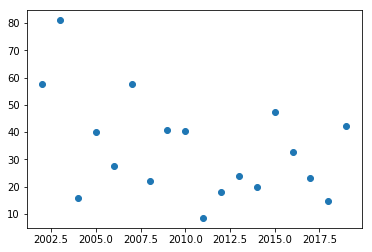

In [153]:
plt.scatter(years, n_critics)

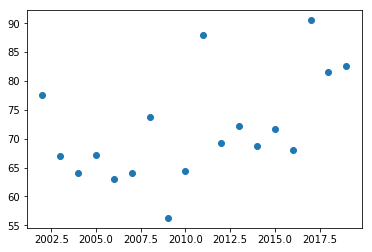

In [154]:
plt.scatter(years, means)

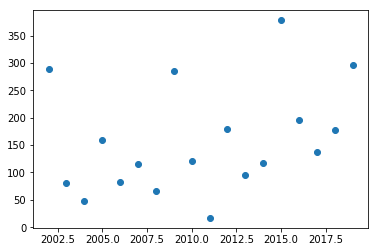

In [157]:
plt.scatter(years, total)

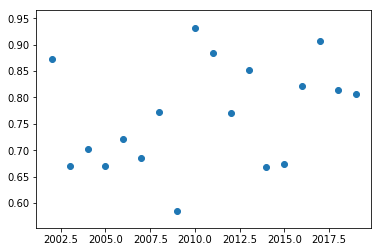

In [158]:
plt.scatter(years, np.array(positive)/np.array(total))


In [159]:
maxs = []
for name, group in df_rotten.groupby('year'):    
    maxs.append(group.tomatometer.max())
    print(group[group.tomatometer==group.tomatometer.max()].title.values[0])

Abril Despedaçado
Ônibus 174
Carandiru
Soy Cuba, O Mamute Siberiano
2 Filhos de Francisco: A História de Zezé di Camargo & Luciano
Antônia
Cidade dos Homens
Verônica
Viajo Porque Preciso, Volto Porque te Amo
Waste Land
Found Memories
Neighboring Sounds
O Menino e o Mundo
Hoje Eu Quero Voltar Sozinho
Tudo Que Aprendemos Juntos
Aquarius
Como Nossos Pais
Bixa Travesty
The Edge of Democracy


In [161]:
df_rotten.loc[15, 'tomatometer'] = 63
df_rotten.loc[15, 'total_count'] = 30

In [162]:
df_rotten.loc[19, 'tomatometer'] = 71
df_rotten.loc[19, 'total_count'] = 14

In [163]:
df_rotten.loc[61, 'tomatometer'] = 0
df_rotten.loc[61, 'total_count'] = 0

In [164]:
df_rotten.loc[70, 'tomatometer'] = 0
df_rotten.loc[70, 'total_count'] = 0

In [165]:
df_rotten.loc[68, 'tomatometer'] = 0
df_rotten.loc[68, 'total_count'] = 0

In [ ]:
for i in [39, 40, 86,87, 88, 92, 93, 52, 56, 73, 65, 78, 79, 89, 90, 84, 91, 72, 82, 83, 49]:
    df_rotten = df_rotten.drop([i])

In [188]:
df_rotten['total'] = df_rotten.tomatometer*df_rotten.total_count/100

## Rotten Analysis

In [301]:
df_rotten.to_csv('rotten_final.csv', index=False)

In [193]:
df_rottenf = pd.read_csv('rotten_final.csv')

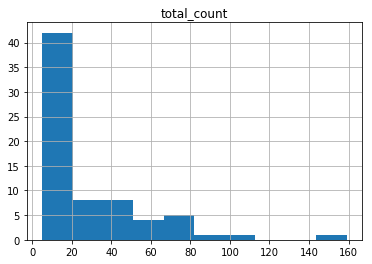

In [197]:
df_rottenf[df_rottenf.total!=0][['total_count']].hist()
plt.savefig('total_count.png', dpi=200)

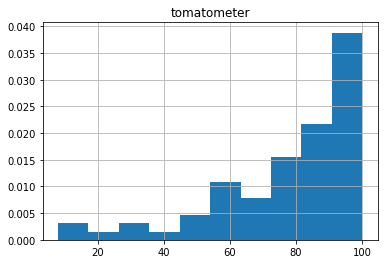

In [198]:
df_rottenf[df_rottenf.total!=0][['tomatometer']].hist(density=True)
plt.savefig('tomatometer.png', dpi=200)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d0a5940>]],
      dtype=object)

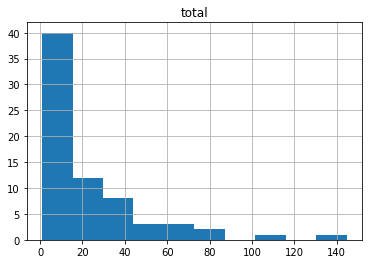

In [196]:
df_rottenf[df_rottenf.total!=0][['total']].hist()

<BarContainer object of 19 artists>

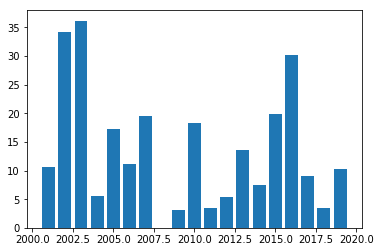

In [449]:
plt.bar(df_rottenf2.groupby('year')['metascore2'].mean().index, \
        df_rottenf2.groupby('year')['metascore2'].mean().values)

In [200]:
df_rottenf2 = df_rottenf

In [203]:
df_rottenf2['total_neg'] = df_rottenf2.total_count-df_rottenf2.total

/Users/leozeine/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


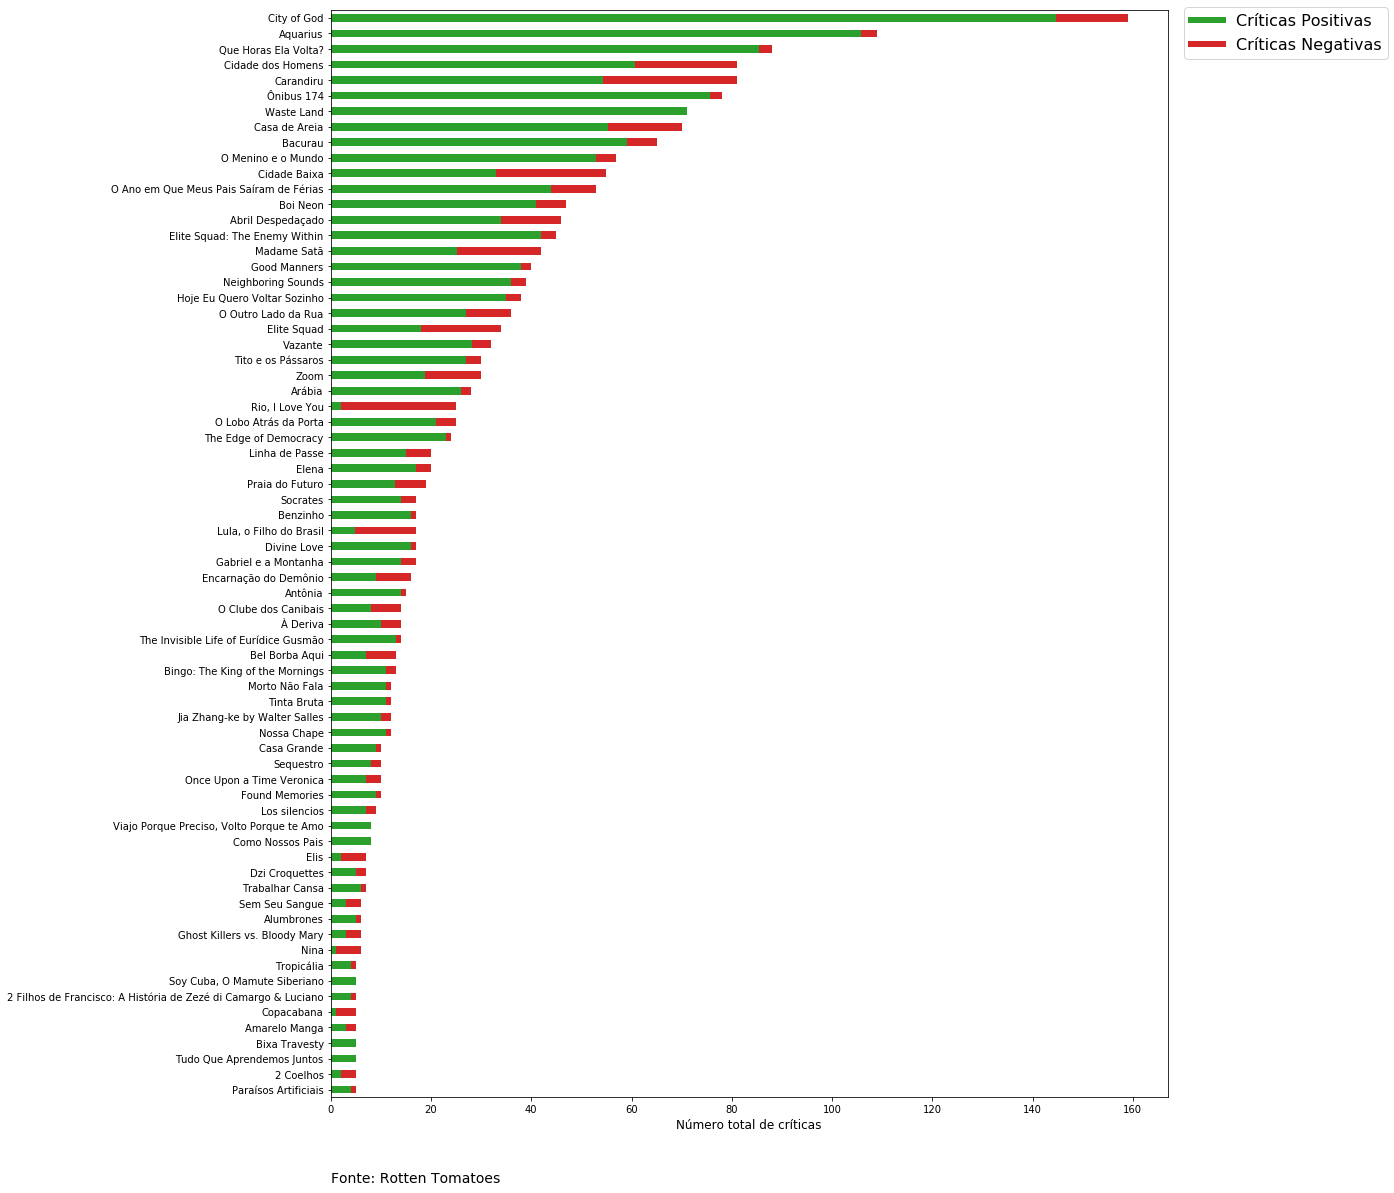

In [205]:
df_rottenf2.index=df_rottenf2.title
df_rottenf2[df_rottenf2.total_count!=0].sort_values(by='total_count', ascending=True)[['total', 'total_neg']].plot(kind='barh', stacked=True, figsize=(15, 20), \
                                                                                                                  colors=['tab:green', 'tab:red'], label=['críticas positivas', 'críticas negativas'])
plt.ylabel('')
custom_lines = [Line2D([0], [0], color='tab:green', lw=6),
                Line2D([0], [0], color='tab:red', lw=6)]



plt.legend(custom_lines, ['Críticas Positivas', 'Críticas Negativas'], loc=(1.02,.955), fontsize=16)
plt.text(x=0, y=-6, s='Fonte: Rotten Tomatoes', fontsize=14, ha="left")
plt.xlabel('Número total de críticas', fontsize=12)
plt.savefig('TotalCriticsRotten.png', dpi=200, bbox_inches='tight')

In [441]:
df_rottenf2['metascore2'] = df_rottenf2['metascore']*(df_rottenf2['total_count']/df_rottenf2['total_count'].max())

Text(0.5, 0, 'Número de críticas positivas')

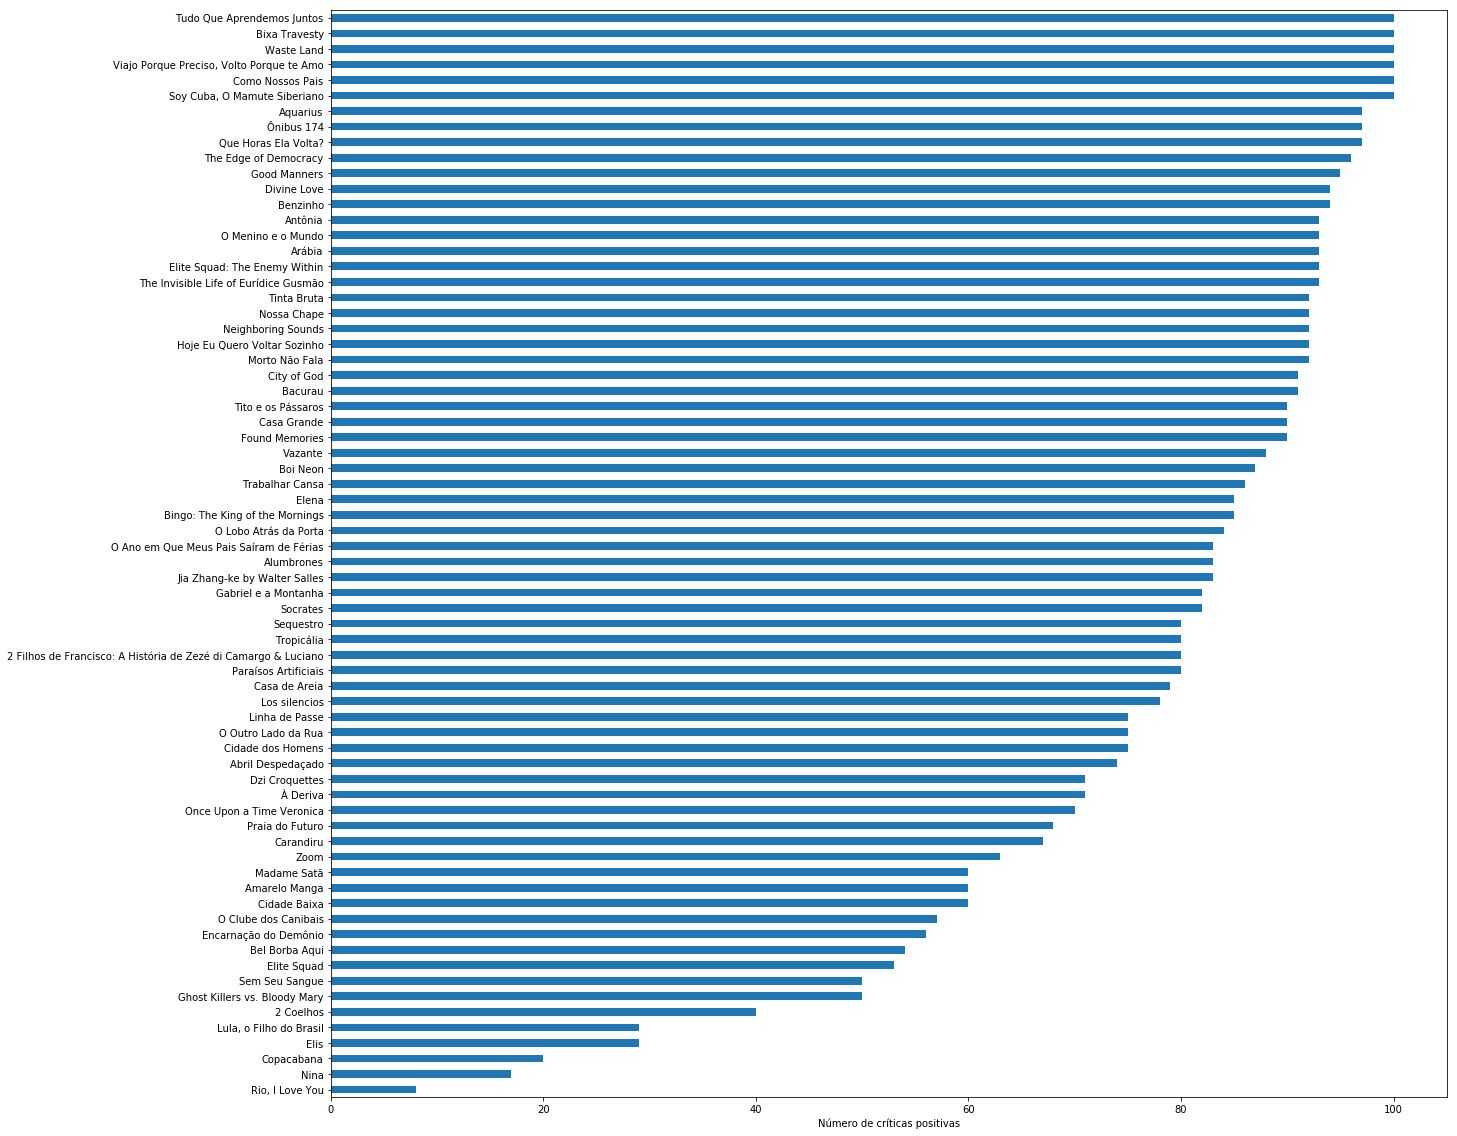

In [424]:
plt.subplots(figsize=(20, 20))
df_rottenf2.index=df_rottenf2.title
df_rottenf2[df_rottenf2.tomatometer!=0].sort_values(by='tomatometer', ascending=True)['tomatometer'].plot(kind='barh')
plt.ylabel('')
plt.xlabel('Número de críticas positivas')

## 0-20
## 20-80
## >80